# Unimodal Tags BMA
This notebook is composed as follows:
- Utils: section with parameters setup and function definition
- Load Training Data (loading and preprocessing of training data)
- BMA on training data:
    - cross validation on training data to compute models' reliability [one fold is isolated for bma testing] 
    - cross validation on training data to compute models' performances
    - BMA model predictions on training data
- Load Training Data (loading and preprocessing of test data)
- BMA on test data:
    - cross validation on training data to compute models' reliability
    - cross validation on training data to compute models' performances
    - BMA model predictions on test data
- Load Training Data (loading and preprocessing of synthetic data)
- BMA on Synthetic data:
    - cross validation on training data to compute models' reliability
    - cross validation on training data to compute models' performances
    - BMA model predictions on test data

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from statistics import mean
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mean

In [4]:
project_paths.csv_uni_tags_test_scores

'../data/results2strategy/tags/test/score_test_tags10fold_803.csv'

In [3]:
from Utils import load_data, project_paths, evaluation_metrics, preprocessing

## Utils

In [3]:
model_list = ["SVM", "KNN", "NB","DT", "MLP"]

In [4]:
kfold = load_data.load_folds()

In [5]:
# Create a folder to store results
data_folder = project_paths.folder_results
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

## Load Training Data

In [4]:
dataset = load_data.load_training_data_tag()
dataset

,file_name,misogynous,Straw,Pepperoni,Hallway,Potato,Pie,Tablet,Luggage,Bolt,...,Barricade,Ribbon,Magazine,Goose,Heart,Crowd,Fish,Sky,Shadow,Cloud
0,1.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.330280,0.0
1,10.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283821,0.0
2,1000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,10000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,10006.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15002.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9996,15003.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9997,15004.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9998,15005.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [7]:
tags_impo = ["Woman", "Man", "Suit", "Dress", "Girl", "Beard", "Collar"]
vis = []
dataset = load_data.data_tag_selection(dataset, tags_impo)

In [6]:
dataset = load_data.load_training_data_tag_masked()
dataset.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "1_y"], inplace=True)
dataset

,file_name,misogynous,Costume,Sidewalk,Palm tree,Tarp,Hot dog,Life jacket,Tripod,Rainbow,...,Bride,Bear,Coin,Archway,Mask,Bird,Hair dryer,Toaster,Van,MASK
0,1.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,10.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,10000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,10006.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15002.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9996,15003.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9997,15004.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9998,15005.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
dataset = load_data.load_training_data_tag_masked_count()
dataset

,Unnamed: 0,Unnamed: 0.1,file_name,misogynous,1_y,Drawing,Hay,Hood,Egg,Radiator,...,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net,MASK_POS,MASK_NEG
0,0,0,1.jpg,0,"[{'class': 'Jug', 'conf': 0.9514831900596619, ...",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1,10.jpg,1,"[{'class': 'Stump', 'conf': 0.9555912613868713...",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
2,2,2,1000.jpg,0,"[{'class': 'Hair', 'conf': 0.7240530252456665,...",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,3,3,10000.jpg,0,"[{'class': 'Poster', 'conf': 0.930622816085815...",0.0,0.0,0.0,0.0,0.0,...,0.760468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,4,4,10006.jpg,0,"[{'class': 'Pumpkin', 'conf': 0.98442625999450...",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,15002.jpg,0,"[{'class': 'Arm', 'conf': 0.9864069819450378, ...",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
9996,9996,9996,15003.jpg,0,"[{'class': 'Hair', 'conf': 0.9638645648956299,...",0.0,0.0,0.0,0.0,0.0,...,0.553142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
9997,9997,9997,15004.jpg,0,"[{'class': 'Dress', 'conf': 0.9925011992454529...",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
9998,9998,9998,15005.jpg,0,"[{'class': 'Knob', 'conf': 0.895808219909668, ...",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [8]:
dataset = load_data.load_training_data_tag_censored()
dataset

,Unnamed: 0,file_name,misogynous,1_y,Drawing,Hay,Hood,Egg,Radiator,Animal,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,0,1.jpg,0,"[{'class': 'Jug', 'conf': 0.9514831900596619, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10.jpg,1,"[{'class': 'Stump', 'conf': 0.9555912613868713...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1000.jpg,0,"[{'class': 'Hair', 'conf': 0.7240530252456665,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,10000.jpg,0,"[{'class': 'Poster', 'conf': 0.930622816085815...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.760468,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,10006.jpg,0,"[{'class': 'Pumpkin', 'conf': 0.98442625999450...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15002.jpg,0,"[{'class': 'Arm', 'conf': 0.9864069819450378, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9996,15003.jpg,0,"[{'class': 'Hair', 'conf': 0.9638645648956299,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.553142,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9997,15004.jpg,0,"[{'class': 'Dress', 'conf': 0.9925011992454529...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,9998,15005.jpg,0,"[{'class': 'Knob', 'conf': 0.895808219909668, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
dataset["Bear"][1]

0.0

In [9]:
dataset["Bottle"][1]

0.6049060225486755

In [18]:
dataset.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "1_y"], inplace=True)

In [19]:
dataset

,file_name,misogynous,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,...,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net,MASK_POS,MASK_NEG
0,1.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,10.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
2,1000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,10000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.760468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,10006.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15002.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
9996,15003.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.553142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
9997,15004.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
9998,15005.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [15]:
dataset.iloc[:,2:]

,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,Man,Racket,...,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net,MASK_POS,MASK_NEG
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.654480,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.902703,0.0,...,0.760468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.553142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## Models on Training data

In [25]:
if not os.path.exists(project_paths.folder_res_train):
    os.makedirs(project_paths.folder_res_train)

In [13]:
# create a dictionary to store models scores
keys = ['SCORE ' + str(num) + ' ' + model.upper()  for model in model_list for num in [0,1]]
keys.insert(0,'FOLD')
scores = dict((el,[]) for el in keys)
scores['FOLD']=list(range(1, 11))
del keys
scores

{'FOLD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'SCORE 0 SVM': [],
 'SCORE 1 SVM': [],
 'SCORE 0 KNN': [],
 'SCORE 1 KNN': [],
 'SCORE 0 NB': [],
 'SCORE 1 NB': [],
 'SCORE 0 DT': [],
 'SCORE 1 DT': [],
 'SCORE 0 MLP': [],
 'SCORE 1 MLP': []}

#### Kfold to compute f1-reliability for later usage in BMA.

For each of the 10Fold execution, 1 fold is isolated since it will be later use to test the BMA model, while the other are use with a 9-fold (8-fold for training and one fold for test) approach to compute reliability.
The results are 10 F1 mesures (each obtained by the 9-fold approach).Performance are stored in dictionaries and saved in a csv file.

In [27]:
for key, val in kfold.items():

    test_complete = []
    y_pred_svm = []
    y_pred_knn = []
    y_pred_nb = []
    y_pred_dt = []
    y_pred_mlp = []

    train_ids = val["train"]

    print(f'FOLD BMA {key}')

    train_dataset =  dataset.iloc[train_ids,2:]
    #train = list(train_dataset["use"])
    labels_train =  dataset.iloc[train_ids][['misogynous']]
    y_train = list(labels_train["misogynous"])

    folds = KFold(n_splits=9, shuffle=True)
    fold_dataset = dataset.iloc[train_ids]
    count= 1
    for train_id, test_id in folds.split(fold_dataset):
        print("\t internal FOLD", count)
        train_fold = fold_dataset.iloc[train_id,2:]
        test_fold = fold_dataset.iloc[test_id,2:]
        train_f = train_fold
        test_f = test_fold
        targets_train =  fold_dataset.iloc[train_id][['misogynous']]
        targets_test = fold_dataset.iloc[test_id][['misogynous']]
        target_train = list(targets_train["misogynous"])
        target_test = list(targets_test["misogynous"])

        test_complete = test_complete + target_test

        #_______________________________ Support Vector Machine_______________________________
        svc = LinearSVC(C = 1,  dual=True, penalty = "l2", loss="hinge")
        svc = CalibratedClassifierCV(svc)
        svc.fit(train_f, target_train)
        y_pred_svm = y_pred_svm + svc.predict(test_f).tolist()

    
        #_______________________________K-Nearest Neighbor_______________________________
        knn = KNeighborsClassifier(n_neighbors=23)
        clf = knn.fit(train_f, target_train)
        y_pred_knn = y_pred_knn +  clf.predict(test_f).tolist()

        #_______________________________ Naive Bayes_______________________________
        naive_bayes= MultinomialNB()
        naive_bayes.fit(train_f, target_train)
        y_pred_nb = y_pred_nb + naive_bayes.predict(test_f).tolist()

        #______________________________Decision Tree_______________________________
        dtr = DecisionTreeClassifier(max_depth=6)
        dtr.fit(train_f, target_train)
        y_pred_dt = y_pred_dt + dtr.predict(test_f).tolist()

        #_______________________________ Multilayer Percepron _______________________________
        mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
        mlp.fit(train_f, target_train)
        y_pred_mlp = y_pred_mlp + mlp.predict(test_f).tolist()

        count +=1

    svm_results = evaluation_metrics.compute_evaluation_metrics(y_pred_svm, test_complete)
    knn_results = evaluation_metrics.compute_evaluation_metrics(y_pred_knn, test_complete)
    nb_results = evaluation_metrics.compute_evaluation_metrics(y_pred_nb, test_complete)
    dt_results = evaluation_metrics.compute_evaluation_metrics(y_pred_dt, test_complete)
    mlp_results = evaluation_metrics.compute_evaluation_metrics(y_pred_mlp, test_complete)

    for key, value in scores.items():
        if key != 'FOLD':
            num = key.split(' ')[1]
            model = key.split(' ')[2].lower()
            value.append(globals()[model + '_results']['f1'][int(num)])

data_score= pd.DataFrame(scores)

FOLD BMA fold_1
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_2
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_3
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_4
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_5
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 internal FOLD 6
	 internal FOLD 7
	 internal FOLD 8
	 internal FOLD 9
FOLD BMA fold_6
	 internal FOLD 1
	 internal FOLD 2
	 internal FOLD 3
	 internal FOLD 4
	 internal FOLD 5
	 in

In [38]:
del train_dataset

In [28]:
# Crate a csv file with models performance achieved in every fold
data_score.to_csv(project_paths.csv_uni_tags_train_scores, sep="\t", index=False)
data_score

,FOLD,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,1,0.667142,0.708164,0.650199,0.700752,0.643626,0.715798,0.672424,0.702365,0.659284,0.719538
1,2,0.668480,0.706141,0.655609,0.700000,0.642759,0.714014,0.667679,0.698389,0.658507,0.716175
2,3,0.665163,0.705575,0.653202,0.695398,0.640050,0.712687,0.664405,0.696434,0.654733,0.713937
3,4,0.667140,0.705217,0.653604,0.695480,0.640719,0.711538,0.669616,0.698406,0.657410,0.717299
4,5,0.667458,0.707724,0.654376,0.700736,0.642266,0.715227,0.668768,0.699109,0.657312,0.718104
5,6,0.665796,0.706067,0.649083,0.696967,0.641722,0.713957,0.668988,0.696078,0.658104,0.715522
6,7,0.664125,0.706568,0.653626,0.698003,0.641505,0.714813,0.662405,0.701424,0.654437,0.719291
7,8,0.665240,0.706300,0.651905,0.695417,0.638634,0.713047,0.666978,0.697551,0.656369,0.715229
8,9,0.662282,0.706993,0.652856,0.699554,0.638024,0.714499,0.664702,0.701198,0.656827,0.717325
9,10,0.669032,0.706696,0.652915,0.697181,0.645065,0.714515,0.667831,0.697047,0.660242,0.715903


In [29]:
train, test, y_train, y_test = train_test_split(dataset, dataset["misogynous"], test_size=0.1, random_state=1)

In [37]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(train.iloc[:,2:], y_train)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.657933224657568}

Accuracy: 69.50

Confusion Matrix:
 [[417  87]
 [218 278]]
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       504
           1       0.76      0.56      0.65       496

    accuracy                           0.69      1000
   macro avg       0.71      0.69      0.69      1000
weighted avg       0.71      0.69      0.69      1000

Area under the ROC curve : 0.700061


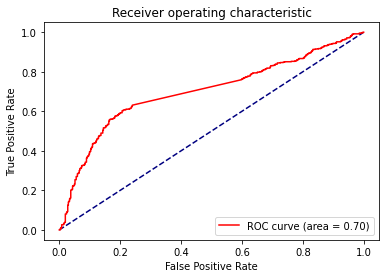

In [47]:
nbayes= GaussianNB(var_smoothing=1)
nbayes.fit(train.iloc[:,2:], y_train)
y_pred_nbay = nbayes.predict(test.iloc[:,2:])
y_prob_nbay = nbayes.predict_proba(test.iloc[:,2:])[:,1]

evaluation_metrics.printResult(y_pred_nbay, y_prob_nbay, y_test)

In [54]:
keys = [model.upper() + ' PROB ' + str(num)  for model in model_list for num in [0,1]]
keys.append("ground_truth")
keys.insert(0, "file_name")
probs = dict((el,[]) for el in keys)
del keys

In [55]:
acc_dict = dict((el,[]) for el in [model.upper() + ' ACC' for model in model_list])
auc_dict = dict((el,[]) for el in [model.upper() + ' AUC' for model in model_list])

### 10-fold to compute models perfomances

10-Fold cross validation approach on training data (9 folds for training models, 1 for test).
Both predicted probabilities and model performances are saved in csv files.

In [56]:
svm_probs_0 = []
svm_probs_1 = []
knn_probs_0 = []
knn_probs_1 = []
nb_probs_0 = []
nb_probs_1 = []
dt_probs_0 = []
dt_probs_1 = []
mlp_probs_0 = []
mlp_probs_1 = []
file_name = []

ground_truth = []

label_nb_complete=[]
label_svm_complete=[]
label_knn_complete=[]
label_dt_complete=[]
label_mlp_complete=[]


num_folds = 10
for key, val in kfold.items():
    train_ids = val["train"]
    test_ids = val["test"]
    # Print
    print(f'FOLD BMA {key}')

    # Define the K-fold Cross Validaton
    f_name = dataset.iloc[test_ids][["file_name"]]
    train_dataset =  dataset.iloc[train_ids,2:]
    test_dataset = dataset.iloc[test_ids,2:]

    train = train_dataset
    test = test_dataset

    probs['file_name'].extend(list(f_name["file_name"]))

    labels_train =  dataset.iloc[train_ids][['misogynous']]
    labels_test = dataset.iloc[test_ids][['misogynous']]
    y_train = list(labels_train["misogynous"])
    y_test = list(labels_test["misogynous"])
    probs['ground_truth'].extend(y_test)

    # _____________________Naive Bayes_____________________
    naive_bayes= GaussianNB()
    naive_bayes.fit(train, y_train)
    labels_nb = naive_bayes.predict(test)
    label_prob_nb = naive_bayes.predict_proba(test)
    label_nb_complete = label_nb_complete + labels_nb.tolist()

    fpr_n, tpr_n, thresholds_n = roc_curve(y_test, label_prob_nb[:,1])

    acc_dict['NB ACC'].append(accuracy_score(y_test,labels_nb))
    auc_dict['NB AUC'].append(auc(fpr_n, tpr_n))

    nb_probs_0.extend(label_prob_nb[:,0])
    nb_probs_1.extend(label_prob_nb[:,1])

    #_____________________ Support Vector Machine_____________________
    svc = LinearSVC(C=10,  dual=False, loss="squared_hinge")
    svc = CalibratedClassifierCV(svc)
    svc.fit(train, y_train)
    labels_svm = svc.predict(test)
    label_prob_svm = svc.predict_proba(test)
    label_svm_complete = label_svm_complete + labels_svm.tolist()

    fpr_s, tpr_s, thresholds_s = roc_curve(y_test, label_prob_svm[:,1])

    acc_dict['SVM ACC'].append(accuracy_score(y_test,labels_svm))
    auc_dict['SVM AUC'].append(auc(fpr_s, tpr_s))

    svm_probs_0.extend(label_prob_svm[:,0])
    svm_probs_1.extend(label_prob_svm[:,1])

    #_____________________K-Nearest Neighbor_____________________
    knn = KNeighborsClassifier(n_neighbors=21)
    clf = knn.fit(train, y_train)
    labels_knn = clf.predict(test)
    label_prob_knn = clf.predict_proba(test)
    label_knn_complete = label_knn_complete + labels_knn.tolist()

    fpr_k, tpr_k, thresholds_k = roc_curve(y_test, label_prob_knn[:,1])

    acc_dict['KNN ACC'].append(accuracy_score(y_test,labels_knn))
    auc_dict['KNN AUC'].append(auc(fpr_k, tpr_k))

    knn_probs_0.extend(label_prob_knn[:, 0])
    knn_probs_1.extend(label_prob_knn[:, 1])

    #_____________________Decisioon Tree_____________________
    dtr = DecisionTreeClassifier(max_depth=3)
    dtr.fit(train, y_train)
    labels_dt = dtr.predict(test)
    label_prob_dt = dtr.predict_proba(test)
    label_dt_complete = label_dt_complete + labels_dt.tolist()

    fpr_d, tpr_d, thresholds_d = roc_curve(y_test, label_prob_dt[:,1])

    acc_dict['DT ACC'].append(accuracy_score(y_test,labels_dt))
    auc_dict['DT AUC'].append(auc(fpr_d, tpr_d))

    dt_probs_0.extend(label_prob_dt[:, 0])
    dt_probs_1.extend(label_prob_dt[:, 1])

    #_______________________________ Multilayer Percepron _______________________________
    mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
    mlp.fit(train, y_train)
    labels_mlp = mlp.predict(test)
    label_prob_mlp = mlp.predict_proba(test)
    label_mlp_complete = label_mlp_complete + labels_mlp.tolist()

    fpr_m, tpr_m, thresholds_m = roc_curve(y_test, label_prob_mlp[:,1])

    acc_dict['MLP ACC'].append(accuracy_score(y_test,labels_mlp))
    auc_dict['MLP AUC'].append(auc(fpr_m, tpr_m))

    mlp_probs_0.extend(label_prob_mlp[:, 0])
    mlp_probs_1.extend(label_prob_mlp[:, 1])

for model in model_list:
    globals()['avg_auc_score_' + model.lower()] = mean(auc_dict[str(model) + ' AUC'])
    globals()['avg_acc_score_' + model.lower()] = mean(acc_dict[str(model) + ' ACC'])

results_svm = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_nb_complete)
results_knn = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_knn_complete)
results_nb = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_nb_complete)
results_dt = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_dt_complete)
results_mlp = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_mlp_complete)

for key, value in probs.items():
    if key != 'file_name' and key != 'ground_truth':
        num = key.split(' ')[2]
        model = key.split(' ')[0].lower()
        probs[key] = globals()[model + '_probs_'+ str(num)]

FOLD BMA fold_1
FOLD BMA fold_2
FOLD BMA fold_3
FOLD BMA fold_4
FOLD BMA fold_5
FOLD BMA fold_6
FOLD BMA fold_7
FOLD BMA fold_8
FOLD BMA fold_9
FOLD BMA fold_10


In [57]:
data_probs = pd.DataFrame(probs)

# Crate a csv file with models predictions (probability) for every meme in the training set
data_probs.to_csv(project_paths.csv_uni_tags_train_probs, sep="\t",index=False)
del probs
data_probs


,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,1.jpg,0.633238,0.366762,0.714286,0.285714,0.710887,0.289113,0.691209,0.308791,0.690120,0.309880,0
1,10000.jpg,0.713027,0.286973,0.666667,0.333333,0.828080,0.171920,0.629571,0.370429,0.655799,0.344201,0
2,1001.jpg,0.633238,0.366762,0.714286,0.285714,0.710887,0.289113,0.691209,0.308791,0.690120,0.309880,1
3,10016.jpg,0.633238,0.366762,0.714286,0.285714,0.710887,0.289113,0.691209,0.308791,0.690120,0.309880,1
4,10028.jpg,0.715659,0.284341,0.476190,0.523810,0.832299,0.167701,0.629571,0.370429,0.653258,0.346742,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9958.jpg,0.743568,0.256432,0.476190,0.523810,0.999757,0.000243,0.626108,0.373892,0.615198,0.384802,1
9996,9984.jpg,0.626514,0.373486,0.619048,0.380952,0.709288,0.290712,0.686821,0.313179,0.677944,0.322056,1
9997,9988.jpg,0.713976,0.286024,0.476190,0.523810,0.830421,0.169579,0.626108,0.373892,0.649404,0.350596,0
9998,9989.jpg,0.695625,0.304375,0.666667,0.333333,0.802770,0.197230,0.686821,0.313179,0.662517,0.337483,0


In [58]:
results_dict_list = ['results_' + model.lower() for model in model_list]
avg_auc_list = ['avg_auc_score_' + model.lower() for model in model_list]
avg_acc_list = ['avg_acc_score_' + model.lower() for model in model_list]

res = {
    "Modelli": model_list,
    "Prec 0": [],
    "Prec 1": [],
    "Prec": [],
    "Rec 0": [],
    "Rec 1": [],
    "Rec": [],
    "F1 0": [],
    "F1 1": [],
    "F1": [],
    "ACC": [],
    "AUC": [],
}

for model in model_list:
    tmp_dict = globals()[results_dict_list[model_list.index(model)]]
    res["Prec 0"]= res["Prec 0"]+[tmp_dict['precision'][0]]
    res["Prec 1"]= res["Prec 1"]+[tmp_dict['precision'][1]]
    res["Prec"]= res["Prec"] + [mean([res["Prec 0"][model_list.index(model)], res["Prec 1"][model_list.index(model)]])]

    res["Rec 0"] = res["Rec 0"]+[tmp_dict['recall'][0]]
    res["Rec 1"]= res["Rec 1"]+[tmp_dict['recall'][1]]
    res["Rec"]= res["Rec"] + [mean([res["Rec 0"][model_list.index(model)], res["Rec 1"][model_list.index(model)]])]

    res["F1 0"] = res["F1 0"]+[tmp_dict['f1'][0]]
    res["F1 1"]= res["F1 1"] +[tmp_dict['f1'][1]]
    res["F1"]= res["F1"] + [mean([res["F1 0"][model_list.index(model)], res["F1 1"][model_list.index(model)]])]

    res['ACC']= res['ACC']+ [globals()[avg_acc_list[model_list.index(model)]]]
    res['AUC']= res['AUC'] + [globals()[avg_auc_list[model_list.index(model)]]]

print(res)

{'Modelli': ['SVM', 'KNN', 'NB', 'DT', 'MLP'], 'Prec 0': [0.7352789256198347, 0.7094829584975655, 0.7352789256198347, 0.7037118868758285, 0.7325953259532595], 'Prec 1': [0.6486618798955613, 0.6588711095480921, 0.6486618798955613, 0.6684325904274754, 0.6593091828138163], 'Prec': [0.691970402757698, 0.6841770340228288, 0.691970402757698, 0.686072238651652, 0.6959522543835379], 'Rec 0': [0.5694, 0.612, 0.5694, 0.637, 0.5956], 'Rec 1': [0.795, 0.7494, 0.795, 0.7318, 0.7826], 'Rec': [0.6822, 0.6807, 0.6822, 0.6844, 0.6891], 'F1 0': [0.6417944093778178, 0.657145925051004, 0.6417944093778178, 0.668696199874029, 0.6570325427468284], 'F1 1': [0.7144140905823149, 0.701225788340975, 0.7144140905823149, 0.6986824517853734, 0.7156835848193872], 'F1': [0.6781042499800664, 0.6791858566959895, 0.6781042499800664, 0.6836893258297012, 0.6863580637831078], 'ACC': [0.6871, 0.6807000000000001, 0.6822, 0.6844, 0.6891], 'AUC': [0.7078938518260292, 0.7171926298578267, 0.6934686615656019, 0.7183235623989758, 0

In [59]:
risultati = pd.DataFrame(res)
risultati

,Modelli,Prec 0,Prec 1,Prec,Rec 0,Rec 1,Rec,F1 0,F1 1,F1,ACC,AUC
0,SVM,0.735279,0.648662,0.691970,0.5694,0.7950,0.6822,0.641794,0.714414,0.678104,0.6871,0.707894
1,KNN,0.709483,0.658871,0.684177,0.6120,0.7494,0.6807,0.657146,0.701226,0.679186,0.6807,0.717193
2,NB,0.735279,0.648662,0.691970,0.5694,0.7950,0.6822,0.641794,0.714414,0.678104,0.6822,0.693469
3,DT,0.703712,0.668433,0.686072,0.6370,0.7318,0.6844,0.668696,0.698682,0.683689,0.6844,0.718324
4,MLP,0.732595,0.659309,0.695952,0.5956,0.7826,0.6891,0.657033,0.715684,0.686358,0.6891,0.728319


In [60]:
# Crate a csv file with averages model performance
risultati.to_csv(project_paths.csv_uni_tags_train_res, sep='\t', index=False)

In [32]:
test_set

,file_name,misogynous,Comb,Bathroom,Statue,Baseball bat,Clock,Badge,Snowboard,Plant,...,Truck,Spoon,Goose,Band,Milk,Bow tie,Groom,Wheelchair,Stair,MASK
0,15236.jpg,0,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0
1,15805.jpg,1,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,1
2,16254.jpg,0,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0
3,16191.jpg,1,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0
4,15952.jpg,0,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,1
996,15049.jpg,0,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,1
997,15363.jpg,1,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,1
998,15199.jpg,0,0.0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0


### BMA

Accuracy: 69.06

Confusion Matrix:
 [[3846 1154]
 [1940 3060]]
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      5000
           1       0.73      0.61      0.66      5000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

Area under the ROC curve : 0.718586
ACC BMA  0.6906
AUC BMA  0.71858592
################  BMA #############################
ACC BMA  0.6906
AUC BMA  0.71858592
precision class 1 of k fold BMA  0.7261509254864736
precision class 0 of kfold BMA  0.664707915658486
recall class 1 k fold BMA 0.612
recall class 0 k fold BMA  0.7692
f1 pos BMA  0.6642066420664207
f1 neg BMA  0.713146671611348


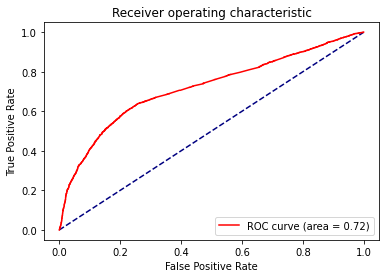

In [61]:
labels_bma = []
sum_prob0_bma =[]
sum_prob1_bma =[]
y_prob_auc = []
predictions_bma = []
tp_bma = []
tn_bma = []
fn_bma = []
fp_bma = []
auc_bma_list = []
acc_bma_list = []
y_test = data_probs["ground_truth"]

# split data according to the 10-fold partition adopted for the score computation
for j in range(0, 10):
    for i in range(j*1000, ((j*1000) + 1000)):
        marginale_0_ = (data_probs["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_probs["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_probs["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_probs["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_probs["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
        marginale_1_ = (data_probs["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_probs["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_probs["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_probs["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_probs["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
        label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
        sum_prob0_bma.append(label_norm_0)
        sum_prob1_bma.append(label_norm_1)

        y_prob_auc.append(marginale_1_)
        if label_norm_0 > label_norm_1:
          labels_bma.append(0)
        else:
          labels_bma.append(1)
predictions_bma.append(labels_bma)

fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
roc_auc_bma = auc(fpr_bma, tpr_bma)
evaluation_metrics.printResult(labels_bma, y_prob_auc, y_test)

auc_bma_list.append(roc_auc_bma)
acc_bma = accuracy_score(y_test,labels_bma)
print("ACC BMA ", acc_bma)
print("AUC BMA ", roc_auc_bma)
acc_bma_list.append(acc_bma)

bma_metrics = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

print("################  BMA #############################")
print("ACC BMA ", acc_bma)
print("AUC BMA ", roc_auc_bma)

print("precision class 1 of k fold BMA ", bma_metrics['precision'][0])
print("precision class 0 of kfold BMA ", bma_metrics['precision'][1])
print("recall class 1 k fold BMA", bma_metrics['recall'][0])
print("recall class 0 k fold BMA ", bma_metrics['recall'][1])
print("f1 pos BMA ", bma_metrics['f1'][0])
print("f1 neg BMA ", bma_metrics['f1'][1])
j = 0
for i in range(0,10):
    data_probs.iloc[j:j+len(test_set)].to_csv(project_paths.csv_uni_tags_syn_probs+str(i+1)+".csv", sep="\t")
    j+=len(test_set)

In [62]:
model_list = ["SVM", "KNN", "NB","DT", "MLP", "BMA"]

In [63]:
# Add BMA to res
res["Modelli"] = model_list
res["Prec 0"] = res["Prec 0"] + [ bma_metrics['precision'][0]]
res["Prec 1"] = res["Prec 1"] + [bma_metrics['precision'][1]]
res["Prec"] = res["Prec"] + [mean([res["Prec 0"][model_list.index('BMA')],res["Prec 1"][model_list.index('BMA')]])]

res["Rec 0"] = res["Rec 0"] + [bma_metrics['recall'][0]]
res["Rec 1"] = res["Rec 1"] + [bma_metrics['recall'][1]]
res["Rec"] = res["Rec"] + [mean([res["Rec 0"][model_list.index('BMA')],res["Rec 1"][model_list.index('BMA')]])]

res["F1 0"] = res["F1 0"] + [bma_metrics['f1'][0]]
res["F1 1"] = res["F1 1"] + [bma_metrics['f1'][1]]
res["F1"] = res["F1"] + [mean([bma_metrics['f1'][0], bma_metrics['f1'][1]])]

res["ACC"] = res["ACC"] + [acc_bma]
res["AUC"] = res["AUC"] + [roc_auc_bma]

In [64]:
risultati_bma = pd.DataFrame(res)
risultati_bma

,Modelli,Prec 0,Prec 1,Prec,Rec 0,Rec 1,Rec,F1 0,F1 1,F1,ACC,AUC
0,SVM,0.735279,0.648662,0.691970,0.5694,0.7950,0.6822,0.641794,0.714414,0.678104,0.6871,0.707894
1,KNN,0.709483,0.658871,0.684177,0.6120,0.7494,0.6807,0.657146,0.701226,0.679186,0.6807,0.717193
2,NB,0.735279,0.648662,0.691970,0.5694,0.7950,0.6822,0.641794,0.714414,0.678104,0.6822,0.693469
3,DT,0.703712,0.668433,0.686072,0.6370,0.7318,0.6844,0.668696,0.698682,0.683689,0.6844,0.718324
4,MLP,0.732595,0.659309,0.695952,0.5956,0.7826,0.6891,0.657033,0.715684,0.686358,0.6891,0.728319
5,BMA,0.726151,0.664708,0.695429,0.6120,0.7692,0.6906,0.664207,0.713147,0.688677,0.6906,0.718586


In [65]:
# rewrite the already created file in order to add BMA results
risultati_bma.to_csv(project_paths.csv_uni_tags_train_res, sep="\t", index=False)

In [67]:
data_probs["BMA PROB 0"] = sum_prob0_bma
data_probs["BMA PROB 1"] = sum_prob1_bma
data_probs["BMA LABELS"] = labels_bma
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth,BMA PROB 0,BMA PROB 1,BMA LABELS
0,1.jpg,0.633238,0.366762,0.714286,0.285714,0.710887,0.289113,0.691209,0.308791,0.690120,0.309880,0,0.671682,0.328318,0
1,10000.jpg,0.713027,0.286973,0.666667,0.333333,0.828080,0.171920,0.629571,0.370429,0.655799,0.344201,0,0.682752,0.317248,0
2,1001.jpg,0.633238,0.366762,0.714286,0.285714,0.710887,0.289113,0.691209,0.308791,0.690120,0.309880,1,0.671682,0.328318,0
3,10016.jpg,0.633238,0.366762,0.714286,0.285714,0.710887,0.289113,0.691209,0.308791,0.690120,0.309880,1,0.671682,0.328318,0
4,10028.jpg,0.715659,0.284341,0.476190,0.523810,0.832299,0.167701,0.629571,0.370429,0.653258,0.346742,0,0.644988,0.355012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9958.jpg,0.743568,0.256432,0.476190,0.523810,0.999757,0.000243,0.626108,0.373892,0.615198,0.384802,1,0.677800,0.322200,0
9996,9984.jpg,0.626514,0.373486,0.619048,0.380952,0.709288,0.290712,0.686821,0.313179,0.677944,0.322056,1,0.648380,0.351620,0
9997,9988.jpg,0.713976,0.286024,0.476190,0.523810,0.830421,0.169579,0.626108,0.373892,0.649404,0.350596,0,0.644020,0.355980,0
9998,9989.jpg,0.695625,0.304375,0.666667,0.333333,0.802770,0.197230,0.686821,0.313179,0.662517,0.337483,0,0.688271,0.311729,0


In [68]:
# rewrite the already created file in order to add BMA results
data_probs.to_csv(project_paths.csv_uni_tags_train_probs, sep="\t", index=False)

## Load Test Data

In [9]:
#create folder 
save_folder = './results/test/masked_count/'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [11]:
dataset

,Unnamed: 0,file_name,misogynous,1_y,Drawing,Hay,Hood,Egg,Radiator,Animal,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,0,1.jpg,0,"[{'class': 'Jug', 'conf': 0.9514831900596619, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10.jpg,1,"[{'class': 'Stump', 'conf': 0.9555912613868713...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1000.jpg,0,"[{'class': 'Hair', 'conf': 0.7240530252456665,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,10000.jpg,0,"[{'class': 'Poster', 'conf': 0.930622816085815...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.760468,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,10006.jpg,0,"[{'class': 'Pumpkin', 'conf': 0.98442625999450...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15002.jpg,0,"[{'class': 'Arm', 'conf': 0.9864069819450378, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9996,15003.jpg,0,"[{'class': 'Hair', 'conf': 0.9638645648956299,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.553142,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9997,15004.jpg,0,"[{'class': 'Dress', 'conf': 0.9925011992454529...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,9998,15005.jpg,0,"[{'class': 'Knob', 'conf': 0.895808219909668, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
kfold = load_data.load_folds()

test_set = load_data.load_test_data_tag()
test_set

,file_name,misogynous,Straw,Pepperoni,Hallway,Potato,Pie,Tablet,Luggage,Bolt,...,Barricade,Ribbon,Magazine,Goose,Heart,Crowd,Fish,Sky,Shadow,Cloud
0,15236.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
1,15805.jpg,1,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
2,16254.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
3,16191.jpg,1,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
4,15952.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
996,15049.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
997,15363.jpg,1,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
998,15199.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0


In [12]:
test_set = load_data.data_tag_selection(test_set, tags_impo)
test_set

,file_name,misogynous,Woman,Man,Girl,Dress,Suit,Collar,Beard
0,15236.jpg,0,0.438966,0.875312,0.000000,0.0,0.349008,0.327667,0.0
1,15805.jpg,1,0.298647,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,16254.jpg,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,16191.jpg,1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,15952.jpg,0,0.000000,0.000000,0.830344,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0.700820,0.879976,0.000000,0.0,0.540799,0.000000,0.0
996,15049.jpg,0,0.000000,0.459063,0.000000,0.0,0.000000,0.000000,0.0
997,15363.jpg,1,0.519224,0.000000,0.363941,0.0,0.000000,0.000000,0.0
998,15199.jpg,0,0.296232,0.854680,0.000000,0.0,0.000000,0.000000,0.0


In [14]:
test_set = load_data.load_test_data_tag_masked()
test_set.drop(columns=["1_y", "Unnamed: 0"], inplace=True)
test_set

,file_name,misogynous,Costume,Sidewalk,Palm tree,Tarp,Hot dog,Life jacket,Tripod,Rainbow,...,Bride,Bear,Coin,Archway,Mask,Bird,Hair dryer,Toaster,Van,MASK
0,15236.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,0
1,15805.jpg,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
2,16254.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,0
3,16191.jpg,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,0
4,15952.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
996,15049.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
997,15363.jpg,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
998,15199.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,0


In [11]:
test_set["MASK"].value_counts()

1    640
0    360
Name: MASK, dtype: int64

In [8]:
test_set = load_data.load_test_data_tag_masked_count()
test_set.drop(columns=["1_y", "Unnamed: 0"], inplace=True)
test_set

,file_name,misogynous,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,...,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net,MASK_POS,MASK_NEG
0,15236.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,0,0
1,15805.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,1,0
2,16254.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,0,0
3,16191.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,0,0
4,15952.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,1,0
996,15049.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,1,0
997,15363.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,3,0
998,15199.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,0,0


In [10]:
test_set = load_data.load_test_data_tag_censored()
test_set.drop(columns=["1_y", "Unnamed: 0"], inplace=True)
test_set

,file_name,misogynous,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,15236.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
1,15805.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
2,16254.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
3,16191.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
4,15952.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
996,15049.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
997,15363.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
998,15199.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0


In [ ]:
test_set = pd.read_csv("../data/datasets/tags_csv/tags_masked_test.csv")
test_set.drop(columns=["Unnamed: 0", "1_y"], inplace=True)
test_se

In [12]:
all_test_tags = list(test_set.columns[2:])
all_train_tags = list(dataset.columns[2:])

In [13]:
all_test_tags

['Drawing',
 'Hay',
 'Hood',
 'Egg',
 'Radiator',
 'Animal',
 'Forehead',
 'Wig',
 'Man',
 'Racket',
 'Jar',
 'Bolt',
 'Frog',
 'Owl',
 'Plate',
 'Platform',
 'Bowl',
 'Awning',
 'Wiper',
 'Tape',
 'Tattoo',
 'Marker',
 'Lantern',
 'Group',
 'Outfit',
 'Costume',
 'Computer monitor',
 'Chalkboard',
 'Dog',
 'Penguin',
 'Handbag',
 'Fountain',
 'Traffic light',
 'Projector',
 'Spatula',
 'Cardboard',
 'Toilet seat',
 'Artichoke',
 'Urinal',
 'Armrest',
 'Tennis ball',
 'Device',
 'Monitor',
 'Inside',
 'Knee',
 'Mane',
 'Seat',
 'Smile',
 'Mantle',
 'Nostril',
 'Screen',
 'Oven',
 'Mouth',
 'Hamburger',
 'Body',
 'Vent',
 'Player',
 'Seaweed',
 'Field',
 'Tire',
 'Picture frame',
 'Knot',
 'Claw',
 'Dessert',
 'Newspaper',
 'Arm',
 'Board',
 'Stick',
 'Cushion',
 'Outlet',
 'Salad',
 'Blade',
 'Parking lot',
 'Monkey',
 'Hair dryer',
 'Refrigerator',
 'Foam',
 'Life jacket',
 'Snowflake',
 'Coin',
 'Jersey',
 'Billboard',
 'Footprint',
 'Bread',
 'Poster',
 'Antelope',
 'Scale',
 'Track

In [14]:
for col in all_test_tags:
    if col not in all_train_tags:
        print("machecazzo faai")

In [18]:
test_set.iloc[:,2:].values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Models on Test Data

In [18]:
model_list = ["SVM", "KNN", "NB","DT", "MLP"]

### Kfold to compute F1-reliability
Train and test of the models on training data in 10 Fold to compute F1 scores.
The scores will be used in the realization of BMA model.

In [19]:
keys = ['SCORE ' + str(num) + ' ' + model.upper()  for model in model_list for num in [0,1]]
scores = dict((el,[]) for el in keys)
del keys

In [17]:
dataset

,file_name,misogynous,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,...,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net,MASK_POS,MASK_NEG
0,1.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,10.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
2,1000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,10000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.760468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,10006.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15002.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
9996,15003.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.553142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
9997,15004.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
9998,15005.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [18]:
test_set

,file_name,misogynous,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,...,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net,MASK_POS,MASK_NEG
0,15236.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,0,0
1,15805.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,1,0
2,16254.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,0,0
3,16191.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,0,0
4,15952.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,1,0
996,15049.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,1,0
997,15363.jpg,1,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,3,0
998,15199.jpg,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0,0,0,0,0,0.0,0,0


In [12]:
dataset.drop(columns = ["Unnamed: 0.1", "1_y", ], inplace=True)

KeyError: "['Unnamed: 0.1'] not found in axis"

In [15]:
dataset.drop(columns = ["1_y", "Unnamed: 0"], inplace=True)

In [20]:
dataset

,file_name,misogynous,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,1.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.760468,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10006.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15002.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,15003.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.553142,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,15004.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,15005.jpg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
dataset["Comb"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Comb, Length: 10000, dtype: float64

In [21]:
test_set.iloc[:,2:]

,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,Man,Racket,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,0,0,0.0,0.0,0,0.0,0.0,0,0.875312,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
1,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
2,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
3,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
4,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0.0,0.0,0,0.0,0.0,0,0.879976,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
996,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
997,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
998,0,0,0.0,0.0,0,0.0,0.0,0,0.854680,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0


In [33]:
test_set

,Unnamed: 0,file_name,misogynous,Folder,Bridge,Windshield,Toiletry,Alarm clock,Pillar,Soap,...,Handbag,Patio,Crown,Cockpit,Crosswalk,Cage,Icing,Cap,Cane,MASK
0,0,15236.jpg,0,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,0
1,1,15805.jpg,1,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,1
2,2,16254.jpg,0,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,0
3,3,16191.jpg,1,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,0
4,4,15952.jpg,0,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,15591.jpg,1,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,1
996,996,15049.jpg,0,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,1
997,997,15363.jpg,1,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,1
998,998,15199.jpg,0,0,0,0,0,0,0.0,0,...,0,0,0.0,0,0,0,0,0.0,0,0


In [34]:
test_set.drop(columns = ["Unnamed: 0"], inplace=True)

In [22]:
test_complete = []
y_pred_svm = []
y_pred_knn = []
y_pred_nb = []
y_pred_dt = []
y_pred_mlp = []

k_folds = 10
num_folds = 10
for key, val in kfold.items():
  
  train_ids = val["train"]
  test_ids = val["test"]
  # Print
  print(f'FOLD BMA {key}')
  # Define the K-fold Cross Validaton

  train_fold = dataset.iloc[train_ids,2:]
  test_fold = dataset.iloc[test_ids,2:]
  train_f = train_fold
  test_f = test_fold
  targets_train =  dataset.iloc[train_ids][['misogynous']]
  targets_test = dataset.iloc[test_ids][['misogynous']]  
  target_train = list(targets_train["misogynous"])
  target_test = list(targets_test["misogynous"])

  test_complete = test_complete + target_test
#_______________________________ SVM_______________________________
  svc = LinearSVC(C = 1,  dual=True, penalty = "l2", loss="hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train_f, target_train)
  y_pred_svm = y_pred_svm + svc.predict(test_f).tolist()

  #_______________________________ KNN_______________________________
  knn = KNeighborsClassifier(n_neighbors=23)
  clf = knn.fit(train_f, target_train)
  y_pred_knn = y_pred_knn +  clf.predict(test_f).tolist()
  
  #_______________________________ NB_______________________________
  naive_bayes= MultinomialNB()
  naive_bayes.fit(train_f, target_train)
  y_pred_nb = y_pred_nb + naive_bayes.predict(test_f).tolist()

  #_______________________________ DT_______________________________
  dtr = DecisionTreeClassifier(max_depth=6)
  dtr.fit(train_f, target_train)
  y_pred_dt = y_pred_dt + dtr.predict(test_f).tolist()
 
  #_______________________________ MLP_______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train_f, target_train)
  y_pred_mlp = y_pred_mlp + mlp.predict(test_f).tolist()


  #_______________________________ RESULTS_______________________________
  svm_results = evaluation_metrics.compute_evaluation_metrics(y_pred_svm, test_complete)
  knn_results = evaluation_metrics.compute_evaluation_metrics(y_pred_knn, test_complete)
  nb_results = evaluation_metrics.compute_evaluation_metrics(y_pred_nb, test_complete)
  dt_results = evaluation_metrics.compute_evaluation_metrics(y_pred_dt, test_complete)
  mlp_results = evaluation_metrics.compute_evaluation_metrics(y_pred_mlp, test_complete)
  

  for key, value in scores.items():
      if key != 'FOLD':
          num = key.split(' ')[1]
          model = key.split(' ')[2].lower()
          value.append(globals()[model + '_results']['f1'][int(num)])
          
data_score= pd.DataFrame(scores)
    

FOLD BMA fold_1


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_2


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_3


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_4


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_5


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_6


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_7


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_8


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_9


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_10


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [23]:
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.651113,0.688742,0.634043,0.675472,0.630928,0.652427,0.648033,0.671180,0.664778,0.622742
1,0.643049,0.688816,0.615723,0.679505,0.615546,0.650763,0.608348,0.695691,0.644202,0.637740
2,0.653860,0.694889,0.627679,0.684324,0.621973,0.658204,0.627131,0.695336,0.648123,0.651857
3,0.652406,0.694836,0.621525,0.685139,0.625297,0.663185,0.615255,0.692602,0.652701,0.659237
4,0.655437,0.695669,0.625055,0.686972,0.624921,0.661594,0.617528,0.693333,0.650182,0.659297
5,0.658765,0.696077,0.624681,0.684759,0.624956,0.659994,0.619492,0.693257,0.649907,0.662850
6,0.658018,0.692443,0.625254,0.683788,0.624475,0.658483,0.618530,0.691473,0.650623,0.660659
7,0.655668,0.690253,0.624778,0.683489,0.628062,0.660691,0.617672,0.692672,0.647074,0.662099
8,0.656024,0.686558,0.627010,0.682907,0.628638,0.658347,0.620201,0.692795,0.646593,0.659393
9,0.654933,0.688546,0.628902,0.686289,0.625941,0.657471,0.620612,0.694758,0.645056,0.660405


In [ ]:
data_score

In [21]:
project_paths.csv_uni_tags_test_scores

'../data/results2strategy/tags/test/score_test_tags10fold_803.csv'

In [17]:
# Crate a csv file with models performance achieved in every fold on training data

data_score.to_csv(project_paths.csv_uni_tags_test_scores, sep="\t", index=False)

#### masked

In [39]:
print(project_paths.csv_uni_tags_test_masked_scores)

../data/results2strategy/tags/masked_test/score_test_tags10fold.csv


In [27]:
data_score.to_csv(project_paths.csv_uni_tags_test_masked_scores, sep="\t", index=False)

#### masked count

In [11]:
print(project_paths.csv_uni_tags_test_masked_count_scores)

../data/results2strategy/tags/masked_count_test/score_test_tags10fold.csv


In [23]:
data_score.to_csv(project_paths.csv_uni_tags_test_masked_count_scores, sep="\t", index=False)

In [13]:
data_score = pd.read_csv(project_paths.csv_uni_tags_test_masked_count_scores, sep="\t")
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.671626,0.708215,0.651416,0.704251,0.645768,0.674976,0.661174,0.680272,0.655378,0.652610
1,0.663784,0.710698,0.640755,0.705775,0.644480,0.680589,0.655720,0.692235,0.640292,0.667629
2,0.667628,0.714197,0.649908,0.712595,0.656873,0.687679,0.657699,0.695433,0.640783,0.673034
3,0.671013,0.719611,0.648981,0.715547,0.664909,0.697884,0.652151,0.697664,0.646039,0.687838
4,0.674735,0.719896,0.650045,0.714597,0.666947,0.698667,0.655150,0.702552,0.652690,0.689276
5,0.675520,0.718731,0.648808,0.711401,0.666667,0.697504,0.658291,0.703796,0.655944,0.686624
6,0.676542,0.715781,0.650166,0.710200,0.667065,0.694867,0.658845,0.706195,0.660722,0.686013
7,0.677596,0.715311,0.652348,0.710999,0.669010,0.694241,0.661106,0.705965,0.658159,0.684533
8,0.678416,0.711561,0.654594,0.709169,0.670962,0.692737,0.665318,0.707022,0.658718,0.679099
9,0.677073,0.712652,0.654889,0.711123,0.669783,0.693531,0.665090,0.708676,0.657164,0.678360


#### censored

In [25]:
print(project_paths.csv_uni_tags_test_censored_scores)

../data/results2strategy/tags/censored_test/score_test_tags10fold.csv


In [26]:
data_score.to_csv(project_paths.csv_uni_tags_test_censored_scores, sep="\t", index=False)

### 10-fold to compute model performance
Train the model on training data, test on test data

In [27]:
keys = [model.upper() + ' PROB ' + str(num)  for model in model_list for num in [0,1]]
keys.append("ground_truth")
keys.insert(0, "file_name")

In [28]:
probs = dict((el,[]) for el in keys)
probs
#del keys

{'file_name': [],
 'SVM PROB 0': [],
 'SVM PROB 1': [],
 'KNN PROB 0': [],
 'KNN PROB 1': [],
 'NB PROB 0': [],
 'NB PROB 1': [],
 'DT PROB 0': [],
 'DT PROB 1': [],
 'MLP PROB 0': [],
 'MLP PROB 1': [],
 'ground_truth': []}

In [29]:
acc_dict = dict((el,[]) for el in [model.upper() + ' ACC' for model in model_list])
auc_dict = dict((el,[]) for el in [model.upper() + ' AUC' for model in model_list])

In [30]:
dataset.iloc[:,2:]

,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,Man,Racket,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.654480,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.902703,0.0,...,0.0,0.0,0.760468,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.553142,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
test_set.iloc[:,2:]

,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,Man,Racket,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,0,0,0.0,0.0,0,0.0,0.0,0,0.875312,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
1,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
2,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
3,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
4,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0.0,0.0,0,0.0,0.0,0,0.879976,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
996,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
997,0,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0
998,0,0,0.0,0.0,0,0.0,0.0,0,0.854680,0.0,...,0.0,0,0.0,0.0,0,0,0,0,0,0.0


In [32]:
svm_probs_0 = []
svm_probs_1 = []
knn_probs_0 = []
knn_probs_1 = []
nb_probs_0 = []
nb_probs_1 = []
dt_probs_0 = []
dt_probs_1 = []
mlp_probs_0 = []
mlp_probs_1 = []
file_name = []

ground_truth = []

label_nb_complete=[]
label_svm_complete=[]
label_knn_complete=[]
label_dt_complete=[]
label_mlp_complete=[]

num_folds = 10
test = test_set.iloc[:,2:]
y_test = list(test_set["misogynous"])
file_names = list(test_set["file_name"])
ground_truth = y_test
for key, val in kfold.items():
  # Print
  print(f'FOLD BMA {key}')
  
  # Define the K-fold Cross Validaton
  dataset = dataset.sample(frac=1).reset_index(drop=True)  #return all rows (in random order)

  train = dataset.iloc[:,2:]
  y_train = list(dataset["misogynous"])
  probs['ground_truth'].extend(y_test)
  probs['file_name'].extend(file_names)

  # _____________________Naive Bayes_____________________
  naive_bayes= MultinomialNB()
  naive_bayes.fit(train, y_train)
  labels_nb = naive_bayes.predict(test)
  label_prob_nb = naive_bayes.predict_proba(test)
  label_nb_complete = label_nb_complete + labels_nb.tolist()

  fpr_n, tpr_n, thresholds_n = roc_curve(y_test, label_prob_nb[:,1])
  
  acc_dict['NB ACC'].append(accuracy_score(y_test,labels_nb))
  auc_dict['NB AUC'].append(auc(fpr_n, tpr_n))
  
  nb_probs_0.extend(label_prob_nb[:,0])
  nb_probs_1.extend(label_prob_nb[:,1])

  #_____________________ Support Vector Machine_____________________
  svc = LinearSVC(C = 1,  dual=True, penalty = "l2", loss="hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train, y_train)
  labels_svm = svc.predict(test)
  label_prob_svm = svc.predict_proba(test)
  label_svm_complete = label_svm_complete + labels_svm.tolist()
  
  fpr_s, tpr_s, thresholds_s = roc_curve(y_test, label_prob_svm[:,1])

  acc_dict['SVM ACC'].append(accuracy_score(y_test,labels_svm))
  auc_dict['SVM AUC'].append(auc(fpr_s, tpr_s))

  svm_probs_0.extend(label_prob_svm[:,0])
  svm_probs_1.extend(label_prob_svm[:,1])

  #_____________________K-Nearest Neighbor_____________________
  knn = KNeighborsClassifier(n_neighbors=23)
  clf = knn.fit(train, y_train)
  labels_knn = clf.predict(test)
  label_prob_knn = clf.predict_proba(test)
  label_knn_complete = label_knn_complete + labels_knn.tolist()

  fpr_k, tpr_k, thresholds_k = roc_curve(y_test, label_prob_knn[:,1])
  
  acc_dict['KNN ACC'].append(accuracy_score(y_test,labels_knn))
  auc_dict['KNN AUC'].append(auc(fpr_k, tpr_k))

  knn_probs_0.extend(label_prob_knn[:, 0])
  knn_probs_1.extend(label_prob_knn[:, 1])

  #_____________________Decisioon Tree_____________________
  dtr = DecisionTreeClassifier(max_depth=6)
  dtr.fit(train, y_train)
  labels_dt = dtr.predict(test)
  label_prob_dt = dtr.predict_proba(test)
  label_dt_complete = label_dt_complete + labels_dt.tolist()

  fpr_d, tpr_d, thresholds_d = roc_curve(y_test, label_prob_dt[:,1])

  acc_dict['DT ACC'].append(accuracy_score(y_test,labels_dt))
  auc_dict['DT AUC'].append(auc(fpr_d, tpr_d))

  dt_probs_0.extend(label_prob_dt[:, 0])
  dt_probs_1.extend(label_prob_dt[:, 1])

  #_______________________________ Multilayer Percepron _______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train, y_train)
  labels_mlp = mlp.predict(test)
  label_prob_mlp = mlp.predict_proba(test)
  label_mlp_complete = label_mlp_complete + labels_mlp.tolist()

  fpr_m, tpr_m, thresholds_m = roc_curve(y_test, label_prob_mlp[:,1])

  acc_dict['MLP ACC'].append(accuracy_score(y_test,labels_mlp))
  auc_dict['MLP AUC'].append(auc(fpr_m, tpr_m))

  mlp_probs_0.extend(label_prob_mlp[:, 0])
  mlp_probs_1.extend(label_prob_mlp[:, 1])

for model in model_list:
    globals()['avg_auc_score_' + model.lower()] = mean(auc_dict[str(model) + ' AUC'])
    globals()['avg_acc_score_' + model.lower()] = mean(acc_dict[str(model) + ' ACC'])

results_svm = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_nb_complete)
results_knn = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_knn_complete)
results_nb = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_nb_complete)
results_dt = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_dt_complete)
results_mlp = evaluation_metrics.compute_evaluation_metrics(probs['ground_truth'], label_mlp_complete)

for key, value in probs.items():
    if key != 'file_name' and key != 'ground_truth':
        num = key.split(' ')[2]
        model = key.split(' ')[0].lower()
        probs[key] = globals()[model + '_probs_'+ str(num)]

global_results = dict((el,[]) for el in [model for model in model_list])
for model in model_list:
  global_results[model] = [
    globals()['results_' + model.lower()]['precision'],
    globals()['results_' + model.lower()]['recall'],
    globals()['results_' + model.lower()]['f1'],
    [globals()['avg_acc_score_' + model.lower()]],
    [globals()['avg_auc_score_' + model.lower()]]
  ]                          

FOLD BMA fold_1


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_2


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_3


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_4


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_5


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_6


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_7


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_8


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_9


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_10


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [27]:
for model in model_list:
  global_results[model] = [
    globals()['results_' + model.lower()]['precision'],
    globals()['results_' + model.lower()]['recall'],
    globals()['results_' + model.lower()]['f1'],
    [globals()['avg_acc_score_' + model.lower()]],
    [globals()['avg_auc_score_' + model.lower()]]
  ]

In [34]:
data_probs = pd.DataFrame(probs)
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,15236.jpg,0.442501,0.557499,0.391304,0.608696,0.506164,0.493836,0.394619,0.605381,0.674314,0.325686,0
1,15805.jpg,0.293714,0.706286,0.217391,0.782609,0.462473,0.537527,0.276086,0.723914,0.147243,0.852757,1
2,16254.jpg,0.616130,0.383870,0.739130,0.260870,0.561344,0.438656,0.666547,0.333453,0.578197,0.421803,0
3,16191.jpg,0.697797,0.302203,0.608696,0.391304,0.569151,0.430849,0.666547,0.333453,0.611883,0.388117,1
4,15952.jpg,0.381946,0.618054,0.391304,0.608696,0.431531,0.568469,0.276086,0.723914,0.193986,0.806014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15591.jpg,0.607841,0.392159,0.434783,0.565217,0.578338,0.421662,0.394619,0.605381,0.757300,0.242700,1
9996,15049.jpg,0.372653,0.627347,0.217391,0.782609,0.479288,0.520712,0.276086,0.723914,0.192632,0.807368,0
9997,15363.jpg,0.273515,0.726485,0.260870,0.739130,0.444667,0.555333,0.276086,0.723914,0.077069,0.922931,1
9998,15199.jpg,0.653856,0.346144,0.565217,0.434783,0.431220,0.568780,0.761329,0.238671,0.411524,0.588476,0


In [24]:
project_paths.csv_uni_tags_test_probs

'../data/results2strategy/tags/test/probs_test_fold_'

In [23]:
# Crate a csv file with models predictions (probability) for every meme in the test set
data_probs.to_csv(project_paths.csv_uni_tags_test_probs, sep="\t", index=False)   

In [7]:
project_paths.csv_uni_text_test_probs

'../data/results2strategy/text/test/probs_test_fold_'

In [5]:
project_paths.csv_uni_tags_test_probs

'../data/results2strategy/tags/test/probs_test_fold_'

In [6]:
project_paths.csv_uni_tags_test_masked_probs

AttributeError: module 'Utils.project_paths' has no attribute 'csv_uni_tags_test_masked_probs'

#### masked

In [84]:
data_probs = pd.read_csv(project_paths.csv_uni_tags_test_masked_probs, sep="\t")
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,15236.jpg,0.506184,0.493816,0.608696,0.391304,0.544457,0.455543,0.712662,0.287338,0.424713,0.575287,0
1,15805.jpg,0.274828,0.725172,0.304348,0.695652,0.421031,0.578969,0.245731,0.754269,0.109148,0.890852,1
2,16254.jpg,0.656576,0.343424,0.695652,0.304348,0.581981,0.418019,0.666547,0.333453,0.844965,0.155035,0
3,16191.jpg,0.711145,0.288855,0.521739,0.478261,0.575802,0.424198,0.666547,0.333453,0.716860,0.283140,1
4,15952.jpg,0.373823,0.626177,0.304348,0.695652,0.389770,0.610230,0.140042,0.859958,0.154526,0.845474,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15591.jpg,0.541686,0.458314,0.260870,0.739130,0.533950,0.466050,0.400722,0.599278,0.201064,0.798936,1
9996,15049.jpg,0.337007,0.662993,0.086957,0.913043,0.434024,0.565976,0.245731,0.754269,0.081137,0.918863,0
9997,15363.jpg,0.262276,0.737724,0.173913,0.826087,0.415344,0.584656,0.245731,0.754269,0.046766,0.953234,1
9998,15199.jpg,0.704452,0.295548,0.695652,0.304348,0.485973,0.514027,0.761329,0.238671,0.599803,0.400197,0


In [36]:
project_paths.csv_uni_tags_test_masked_probs

'../data/results2strategy/tags/masked_test/probs_test_all_fold.csv'

In [37]:
# Crate a csv file with models predictions (probability) for every meme in the test set
data_probs.to_csv(project_paths.csv_uni_tags_test_masked_probs, sep="\t", index=False)

In [85]:
j = 0
for i in range(0,10):
    data_probs.iloc[j:j+len(test_set)].to_csv("../data/results2strategy/tags/masked_test/probs_test_fold_"+str(i+1)+".csv", sep="\t")
    j+=len(test_set)

#### masked count

In [25]:
project_paths.csv_uni_tags_test_masked_count_probs

'../data/results2strategy/tags/masked_count_test/probs_test_all_fold.csv'

In [26]:
# Crate a csv file with models predictions (probability) for every meme in the test set
data_probs.to_csv(project_paths.csv_uni_tags_test_masked_count_probs, sep="\t", index=False)

#### censored

In [35]:
project_paths.csv_uni_tags_test_censored_probs

'../data/results2strategy/tags/censored_test/probs_test_all_fold.csv'

In [36]:
data_probs.to_csv(project_paths.csv_uni_tags_test_censored_probs, sep="\t", index=False)

In [46]:
test_set

,file_name,misogynous,Costume,Sidewalk,Palm tree,Tarp,Hot dog,Life jacket,Tripod,Rainbow,...,Bride,Bear,Coin,Archway,Mask,Bird,Hair dryer,Toaster,Van,MASK
0,15236.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,0
1,15805.jpg,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
2,16254.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,0
3,16191.jpg,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,0
4,15952.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
996,15049.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
997,15363.jpg,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,1
998,15199.jpg,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0,0,0


### BMA

In [37]:
def bma_test(data_score_path, data_probs_path, result_path):
  predictions_bma = []
  auc_bma_list = []
  acc_bma_list = []
  rec_pos = []
  rec_neg = []
  prec_pos = []
  prec_neg = []
  f1_pos = []
  f1_neg = []
  verit_assoluta = []
  y_test_complete = []
  labels_bma_complete=[]

  data_score =  pd.read_csv(data_score_path, sep="\t")
  for j in range(0, 10):
      sum_prob0_bma =[]
      sum_prob1_bma =[]
      data_probs = pd.read_csv(data_probs_path, sep="\t")[j*1000: j*1000+1000].reset_index()
      y_test = data_probs["ground_truth"]
      labels_bma = []
      y_prob_auc = []
      for i in range(0,1000):
          marginale_0_ = (data_probs["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_probs["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_probs["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_probs["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_probs["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
          marginale_1_ = (data_probs["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_probs["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_probs["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_probs["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_probs["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
          label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
          sum_prob0_bma.append(label_norm_0)
          sum_prob1_bma.append(label_norm_1)

          y_prob_auc.append(marginale_1_)
          if label_norm_0 > label_norm_1:
            labels_bma.append(0)
          else:
            labels_bma.append(1)

      data_probs["BMA PROB 0"] = sum_prob0_bma
      data_probs["BMA PROB 1"] = sum_prob1_bma
      data_probs["BMA LABELS"] = labels_bma
      data_probs.to_csv(result_path+str(j+1)+".csv", sep="\t")
      results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

      rec_pos.append(results['recall'][0]) 
      rec_neg.append(results['recall'][1]) 
      f1_pos.append(results['f1'][0])   
      f1_neg.append(results['f1'][1])
      prec_pos.append( results['precision'][0])
      prec_neg.append(results['precision'][1])

      fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
      roc_auc_bma = auc(fpr_bma, tpr_bma)

      auc_bma_list.append(roc_auc_bma)
      acc_bma = accuracy_score(y_test,labels_bma)
      #print("ACC BMA ", acc_bma)
      #print("AUC BMA ", roc_auc_bma)
      acc_bma_list.append(acc_bma)
      predictions_bma.append(labels_bma)
      verit_assoluta.append(y_test)

  verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
  predictions_bma = [item for sublist in predictions_bma for item in sublist]

  print("################  BMA #############################")
  print("ACC BMA ", acc_bma_list)
  print("ACC BMA ", sum(acc_bma_list)/10)
  print("AUC BMA ", auc_bma_list)
  print("AUC BMA ", sum(auc_bma_list)/10)

  print("precision class 1 of k fold BMA ", mean(prec_pos))
  print("precision class 0 of kfold BMA ", mean(prec_neg))
  print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

  print("recall class 1 k fold BMA", mean(rec_pos))
  print("recall class 0 k fold BMA ", mean(rec_neg))
  print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

  print("f1 pos BMA ", mean(f1_pos))
  print("f1 neg BMA ", mean(f1_neg))
  print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
  #j = 0
  #for i in range(0,10):
  #    
  #    j+=len(test_set)
      
  #print(verit_assoluta)
  #print([mean(prec_pos),  mean(prec_neg), mean(rec_pos), mean(rec_neg), mean(f1_pos), mean(f1_neg), sum(acc_bma_list)/10,  sum(auc_bma_list)/10])
  #print(predictions_bma)
  return [mean(prec_pos),  mean(prec_neg), mean(rec_pos), mean(rec_neg), mean(f1_pos), mean(f1_neg), sum(acc_bma_list)/10,  sum(auc_bma_list)/10], verit_assoluta, predictions_bma

In [78]:
bma_res, verit_assoluta, predictions_bma = bma_test(project_paths.csv_uni_tags_test_scores, project_paths.csv_uni_tags_test_probs+ "all.cs", "../data/results2strategy/tags/test/probs_sin_test_fold_")

FileNotFoundError: [Errno 2] No such file or directory: '../data/results2strategy/tags/test/probs_test_fold_all.cs'

### masked BMA

In [79]:
bma_res, verit_assoluta, predictions_bma = bma_test(project_paths.csv_uni_tags_test_masked_scores, project_paths.csv_uni_tags_test_masked_probs, "../data/results2strategy/tags/masked_test/probs_test_fold_")

################  BMA #############################
ACC BMA  [0.607, 0.603, 0.611, 0.61, 0.599, 0.613, 0.602, 0.614, 0.608, 0.618]
ACC BMA  0.6085
AUC BMA  [0.666076, 0.66124, 0.6657799999999999, 0.6641520000000001, 0.6686679999999999, 0.669708, 0.6653479999999999, 0.6623720000000001, 0.6665760000000001, 0.66742]
AUC BMA  0.665734
precision class 1 of k fold BMA  0.5869014013513562
precision class 0 of kfold BMA  0.6445640418909828
prec  0.6157327216211694
recall class 1 k fold BMA 0.7332
recall class 0 k fold BMA  0.4838
rec  0.6085
f1 pos BMA  0.6518990427713393
f1 neg BMA  0.552625248418996
f1  0.6022621455951676


#### masked count

In [27]:
project_paths.csv_uni_tags_test_masked_count_probs

'../data/results2strategy/tags/masked_count_test/probs_test_all_fold.csv'

In [28]:
project_paths.csv_uni_tags_test_masked_count_scores

'../data/results2strategy/tags/masked_count_test/score_test_tags10fold.csv'

In [80]:
bma_res, verit_assoluta, predictions_bma = bma_test(project_paths.csv_uni_tags_test_masked_count_scores, project_paths.csv_uni_tags_test_masked_count_probs, "../data/results2strategy/tags/masked_count_test/probs_test_fold_")

################  BMA #############################
ACC BMA  [0.613, 0.613, 0.613, 0.619, 0.617, 0.615, 0.61, 0.613, 0.608, 0.615]
ACC BMA  0.6136
AUC BMA  [0.6636559999999999, 0.6643560000000001, 0.667124, 0.6668799999999999, 0.6690560000000001, 0.666188, 0.662856, 0.662596, 0.660064, 0.663432]
AUC BMA  0.6646208
precision class 1 of k fold BMA  0.591491436869634
precision class 0 of kfold BMA  0.6498976957899347
prec  0.6206945663297844
recall class 1 k fold BMA 0.7343999999999999
recall class 0 k fold BMA  0.4928
rec  0.6135999999999999
f1 pos BMA  0.6552199649389469
f1 neg BMA  0.5604939414296505
f1  0.6078569531842987


#### censored

In [43]:
project_paths.csv_uni_tags_test_censored_probs

'../data/results2strategy/tags/censored_test/probs_test_all_fold.csv'

In [44]:
project_paths.csv_uni_tags_test_censored_scores

'../data/results2strategy/tags/censored_test/score_test_tags10fold.csv'

In [42]:
bma_res, verit_assoluta, predictions_bma = bma_test(project_paths.csv_uni_tags_test_censored_scores, project_paths.csv_uni_tags_test_censored_probs, "../data/results2strategy/tags/censored_test/probs_test_fold_")

################  BMA #############################
ACC BMA  [0.612, 0.596, 0.61, 0.601, 0.602, 0.6, 0.608, 0.603, 0.607, 0.6]
ACC BMA  0.6039
AUC BMA  [0.67082, 0.663112, 0.667292, 0.6692640000000001, 0.670612, 0.665396, 0.66604, 0.671888, 0.6730160000000001, 0.666228]
AUC BMA  0.6683668
precision class 1 of k fold BMA  0.5813834608830699
precision class 0 of kfold BMA  0.6440051864327305
prec  0.6126943236579002
recall class 1 k fold BMA 0.743
recall class 0 k fold BMA  0.4648
rec  0.6039
f1 pos BMA  0.6522471256238677
f1 neg BMA  0.5397091305280957
f1  0.5959781280759817


In [35]:
predictions_bma = []
auc_bma_list = []
acc_bma_list = []
rec_pos = []
rec_neg = []
prec_pos = []
prec_neg = []
f1_pos = []
f1_neg = []
verit_assoluta = []

y_test_complete = []
labels_bma_complete=[]

data_score =  pd.read_csv("../data/results2strategy/tags/masked_test/score_test_tags_10fold.csv")
for j in range(0, 10):
    sum_prob0_bma =[]
    sum_prob1_bma =[]
    data_probs = pd.read_csv("../data/results2strategy/tags/masked_test/probs_sin_test_fold_all.csv")[j*1000: j*1000+1000].reset_index()
    y_test = data_probs["ground_truth"]
    labels_bma = []
    y_prob_auc = []
    for i in range(0,1000):
        marginale_0_ = (data_probs["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_probs["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_probs["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_probs["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_probs["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
        marginale_1_ = (data_probs["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_probs["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_probs["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_probs["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_probs["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
        label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
        sum_prob0_bma.append(label_norm_0)
        sum_prob1_bma.append(label_norm_1)

        y_prob_auc.append(marginale_1_)
        if label_norm_0 > label_norm_1:
          labels_bma.append(0)
        else:
          labels_bma.append(1)

    data_probs["BMA PROB 0"] = sum_prob0_bma
    data_probs["BMA PROB 1"] = sum_prob1_bma
    data_probs["BMA LABELS"] = labels_bma
    
    results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

    rec_pos.append(results['recall'][0]) 
    rec_neg.append(results['recall'][1]) 
    f1_pos.append(results['f1'][0])   
    f1_neg.append(results['f1'][1])
    prec_pos.append( results['precision'][0])
    prec_neg.append(results['precision'][1])
    
    fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
    roc_auc_bma = auc(fpr_bma, tpr_bma)

    auc_bma_list.append(roc_auc_bma)
    acc_bma = accuracy_score(y_test,labels_bma)
    #print("ACC BMA ", acc_bma)
    #print("AUC BMA ", roc_auc_bma)
    acc_bma_list.append(acc_bma)
    predictions_bma.append(labels_bma)
    verit_assoluta.append(y_test)

verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
predictions_bma = [item for sublist in predictions_bma for item in sublist]

print("################  BMA #############################")
print("ACC BMA ", acc_bma_list)
print("ACC BMA ", sum(acc_bma_list)/10)
print("AUC BMA ", auc_bma_list)
print("AUC BMA ", sum(auc_bma_list)/10)

print("precision class 1 of k fold BMA ", mean(prec_pos))
print("precision class 0 of kfold BMA ", mean(prec_neg))
print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

print("recall class 1 k fold BMA", mean(rec_pos))
print("recall class 0 k fold BMA ", mean(rec_neg))
print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

print("f1 pos BMA ", mean(f1_pos))
print("f1 neg BMA ", mean(f1_neg))
print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
j = 0
for i in range(0,10):
    data_probs.iloc[j:j+len(test_set)].to_csv("../data/results2strategy/tags/masked_test/probs_test_fold_"+str(i+1)+".csv", sep="\t")
    j+=len(test_set)

################  BMA #############################
ACC BMA  [0.507, 0.506, 0.498, 0.506, 0.497, 0.494, 0.499, 0.511, 0.499, 0.502]
ACC BMA  0.5018999999999999
AUC BMA  [0.50066, 0.49978, 0.49049999999999994, 0.49998400000000004, 0.490648, 0.49164399999999997, 0.49356399999999995, 0.49209200000000003, 0.48287599999999997, 0.49449999999999994]
AUC BMA  0.4936247999999999
precision class 1 of k fold BMA  0.501470869295339
precision class 0 of kfold BMA  0.5026748443250776
prec  0.5020728568102083
recall class 1 k fold BMA 0.6514
recall class 0 k fold BMA  0.3524
rec  0.5019
f1 pos BMA  0.5665230597829332
f1 neg BMA  0.41392010193919193
f1  0.49022158086106254


In [45]:
tp_bma = []
tn_bma = []
fn_bma = []
fp_bma = []
predictions_bma_dfs = np.array_split(predictions_bma, 10)
for df in predictions_bma_dfs:
    tn, fp, fn, tp = confusion_matrix(df, y_test).ravel()
    tp_bma.append(tp)
    tn_bma.append(tn)
    fn_bma.append(fn)
    fp_bma.append(fp)

[Text(0, 0.5, 'not misogynous'), Text(0, 1.5, 'misogynous')]

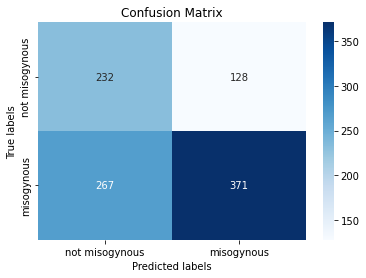

In [46]:
ax= plt.subplot()
sns.heatmap([[mean(tn_bma), mean(fp_bma)],[mean(fn_bma), mean(tp_bma)]], annot=True, fmt='g', cmap="Blues", ax=ax); 

#sns.heatmap([[mean(tn_bma), mean(fp_bma)],[mean(fn_bma), mean(tp_bma)]], annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not misogynous', 'misogynous']); ax.yaxis.set_ticklabels(['not misogynous', 'misogynous'])

In [47]:
measures = ["Prec pos","Prec neg","Rec pos","Rec neg","F1 pos","F1 neg", "ACC", "AUC"]

res_bma = {"measures": measures, 
       "SVM": [item for sublist in global_results['SVM'] for item in sublist] ,
       "KNN":  [item for sublist in global_results['KNN'] for item in sublist] ,
       "NB":  [item for sublist in global_results['NB'] for item in sublist] ,
       "DT":  [item for sublist in global_results['DT'] for item in sublist] ,
       "MLP":  [item for sublist in global_results['MLP'] for item in sublist] ,
       "BMA": bma_res
       }

In [48]:
risultati = pd.DataFrame(res_bma)
risultati

,measures,SVM,KNN,NB,DT,MLP,BMA
0,Prec pos,0.577441,0.578522,0.577441,0.603836,0.562362,0.581383
1,Prec neg,0.613300,0.620874,0.613300,0.622979,0.607007,0.644005
2,Rec pos,0.686000,0.701400,0.686000,0.654800,0.710600,0.743000
3,Rec neg,0.498000,0.489000,0.498000,0.570400,0.447000,0.464800
4,F1 pos,0.627057,0.634063,0.627057,0.628286,0.627849,0.652247
5,F1 neg,0.549669,0.547102,0.549669,0.595531,0.514858,0.539709
6,ACC,0.605100,0.595200,0.592000,0.612600,0.578800,0.603900
7,AUC,0.661762,0.640388,0.640004,0.661472,0.623590,0.668367


In [41]:
# Crate a csv file with averages model performances on test data
risultati.to_csv("../data/results2strategy/tags/masked_test/tags_res_bma_test.csv", sep="\t", index= False)

#### masked

In [62]:
project_paths.csv_uni_tags_test_masked_res

'../data/results2strategy/tags/masked_test/tags_res_bma_test2202.csv'

In [63]:
risultati.to_csv(project_paths.csv_uni_tags_test_masked_res, sep="\t", index= False)

#### masked count

In [37]:
project_paths.csv_uni_tags_test_masked_count_res

'../data/results2strategy/tags/masked_count_test/tags_res_bma_test2202.csv'

In [38]:
risultati.to_csv(project_paths.csv_uni_tags_test_masked_count_res, sep="\t", index= False)

#### censored

In [49]:
project_paths.csv_uni_tags_test_censored_res

'../data/results2strategy/tags/censored_test/tags_res_bma_test2202.csv'

In [50]:
risultati.to_csv(project_paths.csv_uni_tags_test_censored_res, sep="\t", index= False)

## Load Synthetic Data

In [51]:
#create folder 
if not os.path.exists(project_paths.folder_res_syn):
    os.makedirs(project_paths.folder_res_syn)

In [9]:
test_set = load_data.load_syn_data_tag()
test_set

,Unnamed: 0.1,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,Straw,...,Barricade,Ribbon,Magazine,Goose,Heart,Crowd,Fish,Sky,Shadow,Cloud
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.913384,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,0.0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0


In [9]:
test_set = pd.read_csv("../data/datasets/tags_csv/tags_masked_syn.csv")
test_set.drop(columns=["Unnamed: 0", "1"], inplace=True)
test_set

,0,misogynous,Comb,Bathroom,Statue,Baseball bat,Clock,Badge,Snowboard,Plant,...,Truck,Spoon,Goose,Band,Milk,Bow tie,Groom,Wheelchair,Stair,MASK
0,belong_19,1,0,0,0.0,0,0,0,0,0.000000,...,0.0,0,0,0,0,0.0,0,0,0,0
1,belong_21,1,0,0,0.0,0,0,0,0,0.000000,...,0.0,0,0,0,0,0.0,0,0,0,1
2,belong_26,1,0,0,0.0,0,0,0,0,0.000000,...,0.0,0,0,0,0,0.0,0,0,0,1
3,belong_30,1,0,0,0.0,0,0,0,0,0.000000,...,0.0,0,0,0,0,0.0,0,0,0,0
4,belong_31,0,0,0,0.0,0,0,0,0,0.000000,...,0.0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,whisker_5,0,0,0,0.0,0,0,0,0,0.000000,...,0.0,0,0,0,0,0.0,0,0,0,1
360,whisker_6,0,0,0,0.0,0,0,0,0,0.000000,...,0.0,0,0,0,0,0.0,0,0,0,1
361,whisker_7,0,0,0,0.0,0,0,0,0,0.000000,...,0.0,0,0,0,0,0.0,0,0,0,1
362,whisker_8,0,0,0,0.0,0,0,0,0,0.840777,...,0.0,0,0,0,0,0.0,0,0,0,1


In [66]:
test_set = load_data.load_sintest_data_tag_masked()
test_set

,Unnamed: 0,0,misogynous,1,Costume,Sidewalk,Palm tree,Tarp,Hot dog,Life jacket,...,Bride,Bear,Coin,Archway,Mask,Bird,Hair dryer,Toaster,Van,MASK
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
360,360,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
361,361,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
362,362,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...",0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1


In [40]:
test_set = load_data.load_sintest_data_tag_masked_count()
test_set

,Unnamed: 0,0,misogynous,1,Drawing,Hay,Hood,Egg,Radiator,Animal,...,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net,MASK_POS,MASK_NEG
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,1,0
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,2,0
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,2
360,360,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,1
361,361,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,2
362,362,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...",0,0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,2


In [53]:
test_set = load_data.load_sintest_data_tag_censored()
test_set

,Unnamed: 0,0,misogynous,1,Drawing,Hay,Hood,Egg,Radiator,Animal,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
360,360,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
361,361,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0
362,362,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...",0,0,0,0,0.0,0.0,...,0,0,0.0,0,0,0,0,0,0,0


In [10]:
test_set["misogynous"].value_counts()

0    219
1    145
Name: misogynous, dtype: int64

In [38]:
test_set = pd.read_csv("../data/datasets/tags_csv/tags_sin_test1069.csv", sep="\t")
test_set

,Unnamed: 0,file_name,misogynous,1_y,Straw,Pepperoni,Hallway,Potato,Pie,Tablet,...,Barricade,Ribbon,Magazine,Goose,Heart,Crowd,Fish,Sky,Shadow,Cloud
0,0,SIN_75.jpg,0,"[{'class': 'Apron', 'conf': 0.8377617597579956...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
1,1,SIN_43.jpg,0,"[{'class': 'Leg', 'conf': 0.8315523862838745, ...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
2,2,SIN_46.jpg,1,"[{'class': 'Woman', 'conf': 0.8937454223632812...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
3,3,SIN_25.jpg,0,"[{'class': 'Short', 'conf': 0.9161057472229004...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
4,4,SIN_135.jpg,0,"[{'class': 'Duck', 'conf': 0.9616825580596924,...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,SIN_172.jpg,1,"[{'class': 'Poster', 'conf': 0.983604729175567...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
146,146,SIN_77.jpg,0,"[{'class': 'Man', 'conf': 0.9724589586257935, ...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
147,147,SIN_6.jpg,1,"[{'class': 'Hair', 'conf': 0.9422240257263184,...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.389041,0.0,0.0
148,148,SIN_62.jpg,0,"[{'class': 'Eye', 'conf': 0.8460599184036255, ...",0.0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0


In [54]:
#test_set = pd.read_csv("../data/datasets/tags_csv/tags_masked_syn.csv")
test_set.drop(columns = ["Unnamed: 0", "1"], inplace=True)
test_set

,0,misogynous,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,belong_19,1,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0
1,belong_21,1,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0
2,belong_26,1,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0
3,belong_30,1,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0
4,belong_31,0,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,whisker_5,0,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0
360,whisker_6,0,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0
361,whisker_7,0,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0
362,whisker_8,0,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.0,0,0,0,0,0,0,0


In [44]:
test_set.drop(columns = ["Unnamed: 0", ], inplace=True)

In [55]:
test_set.iloc[:,2:]

,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,Man,Racket,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,0,0,0,0,0.0,0.0,0.0,0,0.896747,0,...,0,0,0.0,0,0,0,0,0,0,0
1,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
2,0,0,0,0,0.0,0.0,0.0,0,0.876248,0,...,0,0,0.0,0,0,0,0,0,0,0
3,0,0,0,0,0.0,0.0,0.0,0,0.625609,0,...,0,0,0.0,0,0,0,0,0,0,0
4,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
360,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
361,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
362,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0


In [10]:
test_set.drop(columns = ["Unnamed: 0.1", "tag list", "lemmas", "cleaned", "text","Unnamed: 0.1.1.1", ], inplace=True)

In [11]:
test_set.rename(columns={'0': 'file_name'}, inplace= True)

In [12]:
dataset.iloc[:,2:]

NameError: name 'dataset' is not defined

In [13]:
test_set

,file_name,misogynous,1,Straw,Pepperoni,Hallway,Potato,Pie,Tablet,Luggage,...,Barricade,Ribbon,Magazine,Goose,Heart,Crowd,Fish,Sky,Shadow,Cloud
0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.913384,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
360,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
361,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
362,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...",0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0


In [47]:
test_set.iloc[:,2:]

,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,Man,Racket,...,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net,MASK_POS,MASK_NEG
0,0,0,0,0,0.0,0.0,0.0,0,0.896747,0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0.0,0.0,0.0,0,0.876248,0,...,0.0,0,0,0,0,0,0,0,2,0
3,0,0,0,0,0.0,0.0,0.0,0,0.625609,0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,0,2
360,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,0,1
361,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,0,2
362,0,0,0,0,0.0,0.0,0.0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,0,2


In [57]:
test_set["Lip"][201]

0.0

In [41]:
test_set = load_data.data_tag_selection(test_set, tags_impo)
test_set

,file_name,misogynous,Woman,Man,Girl,Dress,Suit,Collar,Beard
0,15236.jpg,0,0.438966,0.875312,0.000000,0.0,0.349008,0.327667,0.0
1,15805.jpg,1,0.298647,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,16254.jpg,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,16191.jpg,1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,15952.jpg,0,0.000000,0.000000,0.830344,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0.700820,0.879976,0.000000,0.0,0.540799,0.000000,0.0
996,15049.jpg,0,0.000000,0.459063,0.000000,0.0,0.000000,0.000000,0.0
997,15363.jpg,1,0.519224,0.000000,0.363941,0.0,0.000000,0.000000,0.0
998,15199.jpg,0,0.296232,0.854680,0.000000,0.0,0.000000,0.000000,0.0


In [29]:
test_set.describe()

,misogynous,Comb,Bathroom,Statue,Baseball bat,Clock,Badge,Snowboard,Plant,Tub,...,Truck,Spoon,Goose,Band,Milk,Bow tie,Groom,Wheelchair,Stair,MASK
count,364.000000,364.0,364.0,364.000000,364.0,364.0,364.0,364.0,364.000000,364.0,...,364.000000,364.0,364.0,364.0,364.0,364.000000,364.0,364.0,364.0,364.000000
mean,0.398352,0.0,0.0,0.005070,0.0,0.0,0.0,0.0,0.003801,0.0,...,0.006141,0.0,0.0,0.0,0.0,0.001594,0.0,0.0,0.0,0.678571
std,0.490232,0.0,0.0,0.055889,0.0,0.0,0.0,0.0,0.052393,0.0,...,0.068107,0.0,0.0,0.0,0.0,0.030410,0.0,0.0,0.0,0.467668
min,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
75%,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,0.0,0.680996,0.0,0.0,0.0,0.0,0.840777,0.0,...,0.827986,0.0,0.0,0.0,0.0,0.580195,0.0,0.0,0.0,1.000000


In [24]:
test_set["tag list"][0]

"['Letter', 'Face', 'Column', 'Food', 'Mouth', 'Word', 'Sign', 'Shirt', 'Background', 'Ear', 'Nose', 'Head', 'Eye', 'Display', 'Arm', 'Computer', 'Cake', 'Person', 'Glasses', 'Collar', 'Pot', 'Man', 'Sleeve', 'Laptop', 'Hair']"

In [58]:
test_set["Letter"][0]

0.0

In [58]:
test_set["Woman"].value_counts()

0.0    364
Name: Woman, dtype: int64

In [7]:
test_set.iloc[:,2:]

NameError: name 'test_set' is not defined

In [62]:
test

,Straw,Pepperoni,Hallway,Potato,Pie,Tablet,Luggage,Bolt,Lamp shade,Giraffe,...,Barricade,Ribbon,Magazine,Goose,Heart,Crowd,Fish,Sky,Shadow,Cloud
0,0.0,0,0,0,0,0,0.0,0.000000,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
1,0.0,0,0,0,0,0,0.0,0.251081,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
2,0.0,0,0,0,0,0,0.0,0.000000,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
3,0.0,0,0,0,0,0,0.0,0.000000,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
4,0.0,0,0,0,0,0,0.0,0.000000,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0,0,0,0,0,0.0,0.000000,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
146,0.0,0,0,0,0,0,0.0,0.000000,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0
147,0.0,0,0,0,0,0,0.0,0.000000,0,0,...,0,0.0,0,0,0.0,0,0,0.389041,0.0,0.0
148,0.0,0,0,0,0,0,0.0,0.000000,0,0,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,0.0


## Models on Synthetic Data

### Kfold to compute f1-reliability (duplicato: uguale per training data)

In [59]:
keys = ['SCORE ' + str(num) + ' ' + model.upper()  for model in model_list for num in [0,1]]
scores = dict((el,[]) for el in keys)
del keys

In [60]:
test_complete = []
y_pred_svm = []
y_pred_knn = []
y_pred_nb = []
y_pred_dt = []
y_pred_mlp = []

k_folds = 10
num_folds = 10
for key, val in kfold.items():
  
  train_ids = val["train"]
  test_ids = val["test"]
  # Print
  print(f'FOLD BMA {key}')

  train_fold = dataset.iloc[train_ids,2:]
  test_fold = dataset.iloc[test_ids,2:]
  train_f = train_fold
  test_f = test_fold
  targets_train =  dataset.iloc[train_ids][['misogynous']]
  targets_test = dataset.iloc[test_ids][['misogynous']]  
  target_train = list(targets_train["misogynous"])
  target_test = list(targets_test["misogynous"])

  test_complete = test_complete + target_test
  
  #_______________________________ SVM_______________________________
  svc = LinearSVC(C = 1,  dual=True, penalty = "l2", loss="hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train_f, target_train)
  y_pred_svm = y_pred_svm + svc.predict(test_f).tolist()

  #_______________________________ KNN_______________________________
  knn = KNeighborsClassifier(n_neighbors=23)
  clf = knn.fit(train_f, target_train)
  y_pred_knn = y_pred_knn +  clf.predict(test_f).tolist()
  
  #_______________________________ NB_______________________________
  naive_bayes= MultinomialNB()
  naive_bayes.fit(train_f, target_train)
  y_pred_nb = y_pred_nb + naive_bayes.predict(test_f).tolist()

  #_______________________________ DT_______________________________
  dtr = DecisionTreeClassifier(max_depth=6)
  dtr.fit(train_f, target_train)
  y_pred_dt = y_pred_dt + dtr.predict(test_f).tolist()
 
  #_______________________________ MLP_______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train_f, target_train)
  y_pred_mlp = y_pred_mlp + mlp.predict(test_f).tolist()
  
  #_______________________________ RESULTS_______________________________
  svm_results = evaluation_metrics.compute_evaluation_metrics(y_pred_svm, test_complete)
  knn_results = evaluation_metrics.compute_evaluation_metrics(y_pred_knn, test_complete)
  nb_results =  evaluation_metrics.compute_evaluation_metrics(y_pred_nb, test_complete)
  dt_results =  evaluation_metrics.compute_evaluation_metrics(y_pred_dt, test_complete)
  mlp_results = evaluation_metrics.compute_evaluation_metrics(y_pred_mlp, test_complete)

  for key, value in scores.items():
      if key != 'FOLD':
          num = key.split(' ')[1]
          model = key.split(' ')[2].lower()
          value.append(globals()[model + '_results']['f1'][int(num)])
          
data_score= pd.DataFrame(scores)

FOLD BMA fold_1


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_2


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_3


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_4


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_5


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_6


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_7


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_8


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_9


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_10


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [63]:
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.664523,0.706654,0.644031,0.701012,0.678423,0.700772,0.628507,0.701533,0.656280,0.637205
1,0.668824,0.713886,0.642539,0.708711,0.664924,0.692861,0.641934,0.713192,0.658777,0.649087
2,0.674327,0.717885,0.647493,0.709246,0.664803,0.694489,0.651335,0.715496,0.655367,0.653293
3,0.669740,0.717532,0.643575,0.711312,0.658911,0.694168,0.650014,0.718954,0.653370,0.660064
4,0.668252,0.714312,0.644974,0.711047,0.659216,0.692659,0.651740,0.713791,0.656061,0.660707
5,0.672272,0.714197,0.649853,0.710414,0.663520,0.693423,0.654291,0.713218,0.657882,0.658451
6,0.673398,0.713922,0.650796,0.710722,0.665970,0.693950,0.651126,0.714063,0.658380,0.658477
7,0.675914,0.714185,0.652049,0.708262,0.665970,0.693359,0.651794,0.713879,0.661433,0.659310
8,0.675909,0.713942,0.653345,0.709486,0.665428,0.693152,0.653643,0.714126,0.660087,0.658800
9,0.679690,0.714866,0.654788,0.708994,0.667707,0.692715,0.656322,0.713828,0.662084,0.659506


In [52]:
data_score.to_csv("../data/results2strategy/tags/masked_sintest/score_test_tags_10fold.csv")

In [34]:
data_score.to_csv(project_paths.csv_uni_tags_syn_scores, sep="\t", index=False)

#### masked

In [73]:
project_paths.csv_uni_tags_syn_masked_scores

'../data/results2strategy/tags/masked_sintest/score_sin_test_tags10fold.csv'

In [74]:
data_score.to_csv(project_paths.csv_uni_tags_syn_masked_scores, sep="\t", index=False)

#### masked count

In [64]:
project_paths.csv_uni_tags_syn_masked_count_scores

'../data/results2strategy/tags/masked_count_sintest/score_sin_test_tags10fold.csv'

In [65]:
data_score.to_csv(project_paths.csv_uni_tags_syn_masked_count_scores, sep="\t", index=False)

#### censored

In [61]:
project_paths.csv_uni_tags_syn_censored_scores

'../data/results2strategy/tags/censored_sintest/score_sin_test_tags10fold.csv'

In [62]:
data_score.to_csv(project_paths.csv_uni_tags_syn_censored_scores, sep="\t", index=False)

In [37]:
data_score

,Unnamed: 0,FOLD,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0,1,0.738140,0.708245,0.743945,0.649289,0.713472,0.680761,0.691042,0.626932,0.744621,0.706767
1,1,2,0.723062,0.688960,0.731201,0.631079,0.704212,0.668786,0.703522,0.621514,0.730056,0.684382
2,2,3,0.726871,0.694670,0.737785,0.643054,0.713291,0.680986,0.710170,0.620477,0.732342,0.688312
3,3,4,0.724899,0.693953,0.735808,0.646199,0.706778,0.675099,0.705357,0.625000,0.728375,0.686068
4,4,5,0.723316,0.689992,0.732625,0.639587,0.703851,0.669909,0.707659,0.623828,0.723706,0.681730
5,5,6,0.723605,0.689777,0.733508,0.641657,0.702155,0.669480,0.710425,0.629700,0.725408,0.682480
6,6,7,0.729672,0.694461,0.735009,0.642737,0.707383,0.674910,0.714829,0.631751,0.730024,0.685431
7,7,8,0.729211,0.697539,0.735843,0.645794,0.709946,0.679816,0.716927,0.632984,0.732394,0.689702
8,8,9,0.730526,0.698824,0.734622,0.645739,0.713106,0.683189,0.718437,0.632966,0.734369,0.692326
9,9,10,0.729666,0.697532,0.734423,0.644852,0.711467,0.681670,0.717840,0.628028,0.733948,0.691984


In [63]:
del test_complete
del y_pred_svm, y_pred_knn, y_pred_nb, y_pred_dt, y_pred_mlp

### 10-fold to compute models' performance on Sythetic data

In [64]:
keys = [model.upper() + ' PROB ' + str(num)  for model in model_list for num in [0,1]]
keys.append("ground_truth")
keys.insert(0, "file_name")

In [65]:
probs = dict((el,[]) for el in keys)
probs
del keys

In [66]:
acc_dict = dict((el,[]) for el in [model.upper() + ' ACC' for model in model_list])
auc_dict = dict((el,[]) for el in [model.upper() + ' AUC' for model in model_list])

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
data

In [71]:
dataset.iloc[:,2:]

,Drawing,Hay,Hood,Egg,Radiator,Animal,Forehead,Wig,Man,Racket,...,Waist,Broccoli,Jacket,Meat,Bus,Pie,Icon,Deck,Mulch,Net
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.754416,0.0,0.0,0.0,0.0,0.0,0.821905,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.663950,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.830563,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.661851,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.832480,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test_set

NameError: name 'test_set' is not defined

In [72]:
svm_probs_0 = []
svm_probs_1 = []
knn_probs_0 = []
knn_probs_1 = []
nb_probs_0 = []
nb_probs_1 = []
dt_probs_0 = []
dt_probs_1 = []
mlp_probs_0 = []
mlp_probs_1 = []
file_name = []

ground_truth = []

label_nb_complete=[]
label_svm_complete=[]
label_knn_complete=[]
label_dt_complete=[]
label_mlp_complete=[]

num_folds = 10
test = test_set.iloc[:,2:]
y_test = list(test_set["misogynous"])
file_names = list(test_set["file_name"])
ground_truth = y_test

for key, val in kfold.items():
  print(f'FOLD BMA {key}')
  
  dataset = dataset.sample(frac=1).reset_index(drop=True)
  #print(dataset["file_name"])
  train = dataset.iloc[:,2:]
  y_train = list(dataset["misogynous"])

  probs['ground_truth'].extend(y_test)
  probs['file_name'].extend(file_names)
 
  # _____________________Naive Bayes_____________________
  naive_bayes= MultinomialNB()
  naive_bayes.fit(train, y_train)
  labels_nb = naive_bayes.predict(test)
  label_prob_nb = naive_bayes.predict_proba(test)
  label_nb_complete = label_nb_complete + labels_nb.tolist()

  fpr_n, tpr_n, thresholds_n = roc_curve(y_test, label_prob_nb[:,1])
  
  acc_dict['NB ACC'].append(accuracy_score(y_test,labels_nb))
  auc_dict['NB AUC'].append(auc(fpr_n, tpr_n))
  
  nb_probs_0.extend(label_prob_nb[:,0])
  nb_probs_1.extend(label_prob_nb[:,1])
  
  #_____________________ Support Vector Machine_____________________
  svc = LinearSVC(C = 1,  dual=True, penalty = "l2", loss="hinge")
  svc = CalibratedClassifierCV(svc)
  svc.fit(train, y_train)
  labels_svm = svc.predict(test)
  label_prob_svm = svc.predict_proba(test)
  label_svm_complete = label_svm_complete + labels_svm.tolist()
  
  fpr_s, tpr_s, thresholds_s = roc_curve(y_test, label_prob_svm[:,1])

  acc_dict['SVM ACC'].append(accuracy_score(y_test,labels_svm))
  auc_dict['SVM AUC'].append(auc(fpr_s, tpr_s))

  svm_probs_0.extend(label_prob_svm[:,0])
  svm_probs_1.extend(label_prob_svm[:,1])

  #_____________________K-Nearest Neighbor_____________________
  knn = KNeighborsClassifier(n_neighbors=23)
  clf = knn.fit(train, y_train)
  labels_knn = clf.predict(test)
  label_prob_knn = clf.predict_proba(test)
  label_knn_complete = label_knn_complete + labels_knn.tolist()

  fpr_k, tpr_k, thresholds_k = roc_curve(y_test, label_prob_knn[:,1])
  
  acc_dict['KNN ACC'].append(accuracy_score(y_test,labels_knn))
  auc_dict['KNN AUC'].append(auc(fpr_k, tpr_k))

  knn_probs_0.extend(label_prob_knn[:, 0])
  knn_probs_1.extend(label_prob_knn[:, 1])

  #_____________________Decisioon Tree_____________________
  dtr = DecisionTreeClassifier(max_depth=6)
  dtr.fit(train, y_train)
  labels_dt = dtr.predict(test)
  label_prob_dt = dtr.predict_proba(test)
  label_dt_complete = label_dt_complete + labels_dt.tolist()

  fpr_d, tpr_d, thresholds_d = roc_curve(y_test, label_prob_dt[:,1])

  acc_dict['DT ACC'].append(accuracy_score(y_test,labels_dt))
  auc_dict['DT AUC'].append(auc(fpr_d, tpr_d))

  dt_probs_0.extend(label_prob_dt[:, 0])
  dt_probs_1.extend(label_prob_dt[:, 1])

  #_______________________________ Multilayer Percepron _______________________________
  mlp = MLPClassifier(max_iter=400, activation="relu", alpha=0.05, hidden_layer_sizes=(100,), solver="adam", learning_rate="constant")
  mlp.fit(train, y_train)
  labels_mlp = mlp.predict(test)
  label_prob_mlp = mlp.predict_proba(test)
  label_mlp_complete = label_mlp_complete + labels_mlp.tolist()

  fpr_m, tpr_m, thresholds_m = roc_curve(y_test, label_prob_mlp[:,1])

  acc_dict['MLP ACC'].append(accuracy_score(y_test,labels_mlp))
  auc_dict['MLP AUC'].append(auc(fpr_m, tpr_m))

  mlp_probs_0.extend(label_prob_mlp[:, 0])
  mlp_probs_1.extend(label_prob_mlp[:, 1])

for model in model_list:
    globals()['avg_auc_score_' + model.lower()] = mean(auc_dict[str(model) + ' AUC'])
    globals()['avg_acc_score_' + model.lower()] = mean(acc_dict[str(model) + ' ACC'])

results_svm = evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_svm_complete, len(test_set) )
results_knn = evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_knn_complete, len(test_set) )
results_nb = evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_nb_complete, len(test_set) )
results_dt = evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_dt_complete, len(test_set) )
results_mlp = evaluation_metrics.compute_evaluation_metrics_mean(probs['ground_truth'], label_mlp_complete, len(test_set) )

for key, value in probs.items():
    if key != 'file_name' and key != 'ground_truth':
        num = key.split(' ')[2]
        model = key.split(' ')[0].lower()
        probs[key] = globals()[model + '_probs_'+ str(num)]

global_results = dict((el,[]) for el in [model for model in model_list])
for model in model_list:
  global_results[model] = [
    globals()['results_' + model.lower()]['precision'],
    globals()['results_' + model.lower()]['recall'],
    globals()['results_' + model.lower()]['f1'],
    [globals()['avg_acc_score_' + model.lower()]],
    [globals()['avg_auc_score_' + model.lower()]]
  ]

FOLD BMA fold_1


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_2


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_3


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_4


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_5


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_6


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_7


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_8


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_9


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


FOLD BMA fold_10


/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/jimmy/anaconda3/envs/bma_text/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [60]:
project_paths.csv_uni_tags_syn_probs

'../data/results2strategy/tags/new_sintest/probs_sin_test_fold_'

In [ ]:
../data/results2strategy/tags/

In [31]:
data_probs = pd.DataFrame(probs)
# Crate a csv file with models predictions (probability) for every meme in the test set
data_probs.to_csv(project_paths.csv_uni_tags_syn_probs+"all.csv", sep="\t", index=False) 

#### masked

In [81]:
project_paths.csv_uni_tags_syn_masked_probs

'../data/results2strategy/tags/masked_sintest/probs_sin_test_all_fold.csv'

In [92]:
data_probs = pd.DataFrame(probs)

In [88]:
data_probs = pd.read_csv(project_paths.csv_uni_tags_syn_masked_probs, sep="\t")

In [90]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,belong_19,0.590761,0.409239,0.739130,0.260870,0.640302,0.359698,0.712662,0.287338,0.991885,0.008115,1
1,belong_21,0.459147,0.540853,0.391304,0.608696,0.566816,0.433184,0.140042,0.859958,0.639944,0.360056,1
2,belong_26,0.582325,0.417675,0.565217,0.434783,0.618461,0.381539,0.498044,0.501956,0.795670,0.204330,1
3,belong_30,0.526241,0.473759,0.652174,0.347826,0.439973,0.560027,0.434988,0.565012,0.555201,0.444799,1
4,belong_31,0.561411,0.438589,0.739130,0.260870,0.316770,0.683230,0.666547,0.333453,0.630969,0.369031,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,whisker_5,0.604558,0.395442,0.695652,0.304348,0.537365,0.462635,0.666547,0.333453,0.771361,0.228639,0
3636,whisker_6,0.527992,0.472008,0.782609,0.217391,0.452498,0.547502,0.666547,0.333453,0.858332,0.141668,0
3637,whisker_7,0.654709,0.345291,0.565217,0.434783,0.563195,0.436805,0.761329,0.238671,0.936244,0.063756,0
3638,whisker_8,0.666575,0.333425,0.782609,0.217391,0.505064,0.494936,0.761329,0.238671,0.996029,0.003971,0


In [94]:
data_probs = pd.DataFrame(probs)
# Crate a csv file with models predictions (probability) for every meme in the test set
data_probs.to_csv(project_paths.csv_uni_tags_syn_masked_probs, sep="\t", index=False) 

#### masked count

In [54]:
data_probs = pd.DataFrame(probs)

In [55]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,belong_19,0.662543,0.337457,0.739130,0.260870,0.681246,0.318754,0.667213,0.332787,0.984868,0.015132,1
1,belong_21,0.428170,0.571830,0.347826,0.652174,0.479719,0.520281,0.944444,0.055556,0.679207,0.320793,1
2,belong_26,0.388157,0.611843,0.478261,0.521739,0.333844,0.666156,0.537415,0.462585,0.917502,0.082498,1
3,belong_30,0.553502,0.446498,0.652174,0.347826,0.473125,0.526875,0.555957,0.444043,0.769595,0.230405,1
4,belong_31,0.500914,0.499086,0.608696,0.391304,0.331241,0.668759,0.654412,0.345588,0.432471,0.567529,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,whisker_5,0.779236,0.220764,0.782609,0.217391,0.947129,0.052871,0.797240,0.202760,0.782733,0.217267,0
3636,whisker_6,0.665708,0.334292,0.782609,0.217391,0.792293,0.207707,0.797240,0.202760,0.888237,0.111763,0
3637,whisker_7,0.808223,0.191777,0.826087,0.173913,0.952674,0.047326,0.797240,0.202760,0.896863,0.103137,0
3638,whisker_8,0.789007,0.210993,0.826087,0.173913,0.943578,0.056422,0.797240,0.202760,0.986141,0.013859,0


In [57]:
project_paths.csv_uni_tags_syn_masked_count_probs

'../data/results2strategy/tags/masked_count_sintest/probs_sin_test_all_fold.csv'

In [58]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,belong_19,0.662543,0.337457,0.739130,0.260870,0.681246,0.318754,0.667213,0.332787,0.984868,0.015132,1
1,belong_21,0.428170,0.571830,0.347826,0.652174,0.479719,0.520281,0.944444,0.055556,0.679207,0.320793,1
2,belong_26,0.388157,0.611843,0.478261,0.521739,0.333844,0.666156,0.537415,0.462585,0.917502,0.082498,1
3,belong_30,0.553502,0.446498,0.652174,0.347826,0.473125,0.526875,0.555957,0.444043,0.769595,0.230405,1
4,belong_31,0.500914,0.499086,0.608696,0.391304,0.331241,0.668759,0.654412,0.345588,0.432471,0.567529,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,whisker_5,0.779236,0.220764,0.782609,0.217391,0.947129,0.052871,0.797240,0.202760,0.782733,0.217267,0
3636,whisker_6,0.665708,0.334292,0.782609,0.217391,0.792293,0.207707,0.797240,0.202760,0.888237,0.111763,0
3637,whisker_7,0.808223,0.191777,0.826087,0.173913,0.952674,0.047326,0.797240,0.202760,0.896863,0.103137,0
3638,whisker_8,0.789007,0.210993,0.826087,0.173913,0.943578,0.056422,0.797240,0.202760,0.986141,0.013859,0


In [59]:
data_probs.to_csv(project_paths.csv_uni_tags_syn_masked_count_probs, sep="\t", index=False) 

In [73]:
data_probs = pd.read_csv(project_paths.csv_uni_tags_syn_masked_count_probs,  sep="\t")

FileNotFoundError: [Errno 2] No such file or directory: '../data/results2strategy/tags/masked_count_sintest/probs_sin_test_all_fold.csv'

#### censored

In [80]:
data_probs = pd.DataFrame(probs)

In [81]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,belong_19,0.542046,0.457954,0.347826,0.652174,0.593178,0.406822,0.634146,0.365854,0.832488,0.167512,1
1,belong_21,0.485127,0.514873,0.478261,0.521739,0.588964,0.411036,0.000000,1.000000,0.376966,0.623034,1
2,belong_26,0.631002,0.368998,0.652174,0.347826,0.634442,0.365558,0.594612,0.405388,0.933142,0.066858,1
3,belong_30,0.465173,0.534827,0.478261,0.521739,0.404398,0.595602,0.276086,0.723914,0.515227,0.484773,1
4,belong_31,0.498973,0.501027,0.608696,0.391304,0.301371,0.698629,0.666547,0.333453,0.634938,0.365062,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,whisker_5,0.662197,0.337803,0.695652,0.304348,0.587269,0.412731,0.666547,0.333453,0.608082,0.391918,0
3636,whisker_6,0.588632,0.411368,0.826087,0.173913,0.512467,0.487533,0.666547,0.333453,0.715983,0.284017,0
3637,whisker_7,0.697870,0.302130,0.608696,0.391304,0.609145,0.390855,0.761329,0.238671,0.802358,0.197642,0
3638,whisker_8,0.723174,0.276826,0.826087,0.173913,0.539146,0.460854,0.761329,0.238671,0.998184,0.001816,0


In [85]:
project_paths.csv_uni_tags_syn_censored_probs

'../data/results2strategy/tags/censored_sintest/probs_sin_test_all_fold.csv'

In [86]:
data_probs.to_csv(project_paths.csv_uni_tags_syn_censored_probs, sep="\t", index=False) 

In [77]:
test_set["Cat"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
359    0.0
360    0.0
361    0.0
362    0.0
363    0.0
Name: Cat, Length: 364, dtype: float64

In [78]:
project_paths.csv_uni_tags_syn_probs

'../data/results2strategy/tags/new_sintest/probs_sin_test_fold_'

In [39]:
project_paths.csv_uni_tags_new_syn_probs

AttributeError: module 'Utils.project_paths' has no attribute 'csv_uni_tags_new_syn_probs'

### BMA

In [22]:
predictions_bma = []
auc_bma_list = []
acc_bma_list = []
rec_pos = []
rec_neg = []
prec_pos = []
prec_neg = []
f1_pos = []
f1_neg = []
verit_assoluta = []
probs_0_bma = []
probs_1_bma = []
y_test_complete = []
labels_bma_complete=[]

data_score =  pd.read_csv(project_paths.csv_uni_tags_syn_scores, sep="\t")
for j in range(0, 10):
    sum_prob0_bma =[]
    sum_prob1_bma =[]
    data_pr = pd.read_csv(project_paths.csv_uni_tags_syn_probs+"all.csv", sep="\t")[j*len(test_set): j*len(test_set)+len(test_set)].reset_index()
    y_test = data_pr["ground_truth"]
    labels_bma = []
    y_prob_auc = []
    for i in range(0,len(test_set)):
        marginale_0_ = (data_pr["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_pr["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_pr["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_pr["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_pr["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
        marginale_1_ = (data_pr["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_pr["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_pr["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_pr["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_pr["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
        label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
        sum_prob0_bma.append(label_norm_0)
        sum_prob1_bma.append(label_norm_1)

        y_prob_auc.append(marginale_1_)
        if label_norm_0 > label_norm_1:
          labels_bma.append(0)
        else:
          labels_bma.append(1)
    probs_0_bma.append(sum_prob0_bma)
    probs_1_bma.append(sum_prob1_bma)
    data_pr["BMA PROB 0"] = sum_prob0_bma
    data_pr["BMA PROB 1"] = sum_prob1_bma
    data_pr["BMA LABELS"] = labels_bma
    
    results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

    rec_pos.append(results['recall'][0]) 
    rec_neg.append(results['recall'][1]) 
    f1_pos.append(results['f1'][0])   
    f1_neg.append(results['f1'][1])
    prec_pos.append( results['precision'][0])
    prec_neg.append(results['precision'][1])
    
    fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
    roc_auc_bma = auc(fpr_bma, tpr_bma)

    auc_bma_list.append(roc_auc_bma)
    acc_bma = accuracy_score(y_test,labels_bma)

    acc_bma_list.append(acc_bma)
    predictions_bma.append(labels_bma)
    verit_assoluta.append(y_test)


verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
predictions_bma = [item for sublist in predictions_bma for item in sublist]
notmiso_porbs  = [item for sublist in probs_0_bma for item in sublist]
miso_probs  = [item for sublist in probs_1_bma for item in sublist]

data_probs["BMA PROB 0"] = notmiso_porbs
data_probs["BMA PROB 1"] = miso_probs
data_probs["BMA LABELS"] = predictions_bma
print("################  BMA #############################")
print("ACC BMA ", acc_bma_list)
print("ACC BMA ", sum(acc_bma_list)/10)
print("AUC BMA ", auc_bma_list)
print("AUC BMA ", sum(auc_bma_list)/10)

print("precision class 1 of k fold BMA ", mean(prec_pos))
print("precision class 0 of kfold BMA ", mean(prec_neg))
print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

print("recall class 1 k fold BMA", mean(rec_pos))
print("recall class 0 k fold BMA ", mean(rec_neg))
print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

print("f1 pos BMA ", mean(f1_pos))
print("f1 neg BMA ", mean(f1_neg))
print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
j = 0
for i in range(0,10):
    data_probs.iloc[j:j+len(test_set)].to_csv(project_paths.csv_uni_tags_syn_probs+str(i+1)+".csv", sep="\t")
    j+=len(test_set)

################  BMA #############################
ACC BMA  [0.49175824175824173, 0.5027472527472527, 0.5192307692307693, 0.5, 0.5, 0.49725274725274726, 0.510989010989011, 0.5164835164835165, 0.5054945054945055, 0.49175824175824173]
ACC BMA  0.5035714285714286
AUC BMA  [0.4748228625413322, 0.4711069122972761, 0.477846008502598, 0.4687135884112738, 0.46688710439300896, 0.4777200440875453, 0.4800503857660211, 0.47179971658006614, 0.47101243898598644, 0.4650921114785074]
AUC BMA  0.4725051173043616
precision class 1 of k fold BMA  0.3783092576802366
precision class 0 of kfold BMA  0.5879652515437371
prec  0.48313725461198687
recall class 1 k fold BMA 0.3820689655172414
recall class 0 k fold BMA  0.5840182648401826
rec  0.48304361517871197
f1 pos BMA  0.38010422543826033
f1 neg BMA  0.5859321988516587
f1  0.48301821214495955


In [89]:
test_set

,file_name,misogynous,Costume,Sidewalk,Palm tree,Tarp,Hot dog,Life jacket,Tripod,Rainbow,...,Bride,Bear,Coin,Archway,Mask,Bird,Hair dryer,Toaster,Van,MASK
0,belong_19,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
1,belong_21,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
2,belong_26,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
3,belong_30,1,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
4,belong_31,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,whisker_5,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
360,whisker_6,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
361,whisker_7,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1
362,whisker_8,0,0,0.0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,0,0,1


In [61]:
project_paths.csv_uni_tags_syn_masked_count_probs

'../data/results2strategy/tags/masked_count_sintest/probs_sin_test_all_fold.csv'

In [79]:
project_paths.csv_uni_tags_syn_masked_probs

'../data/results2strategy/tags/masked_sintest/probs_sin_test_all_fold.csv'

In [88]:
def bma_sintest(data_score_path, data_probs_path, result_path):
  predictions_bma = []
  auc_bma_list = []
  acc_bma_list = []
  rec_pos = []
  rec_neg = []
  prec_pos = []
  prec_neg = []
  f1_pos = []
  f1_neg = []
  verit_assoluta = []
  y_test_complete = []
  labels_bma_complete=[]

  data_score =  pd.read_csv(data_score_path, sep="\t")
  for j in range(0, 10):
      sum_prob0_bma =[]
      sum_prob1_bma =[]
      data_probs = pd.read_csv(data_probs_path, sep="\t")[j*len(test_set): j*len(test_set)+len(test_set)].reset_index()
      y_test = data_probs["ground_truth"]
      labels_bma = []
      y_prob_auc = []
      for i in range(0,len(test_set)):
          marginale_0_ = (data_probs["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_probs["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_probs["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_probs["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_probs["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
          marginale_1_ = (data_probs["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_probs["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_probs["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_probs["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_probs["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
          label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
          sum_prob0_bma.append(label_norm_0)
          sum_prob1_bma.append(label_norm_1)

          y_prob_auc.append(marginale_1_)
          if label_norm_0 > label_norm_1:
            labels_bma.append(0)
          else:
            labels_bma.append(1)

      data_probs["BMA PROB 0"] = sum_prob0_bma
      data_probs["BMA PROB 1"] = sum_prob1_bma
      data_probs["BMA LABELS"] = labels_bma
      data_probs.to_csv(result_path+str(j+1)+".csv", sep="\t")
      results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

      rec_pos.append(results['recall'][0]) 
      rec_neg.append(results['recall'][1]) 
      f1_pos.append(results['f1'][0])   
      f1_neg.append(results['f1'][1])
      prec_pos.append( results['precision'][0])
      prec_neg.append(results['precision'][1])

      fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
      roc_auc_bma = auc(fpr_bma, tpr_bma)

      auc_bma_list.append(roc_auc_bma)
      acc_bma = accuracy_score(y_test,labels_bma)
      #print("ACC BMA ", acc_bma)
      #print("AUC BMA ", roc_auc_bma)
      acc_bma_list.append(acc_bma)
      predictions_bma.append(labels_bma)
      verit_assoluta.append(y_test)

  verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
  predictions_bma = [item for sublist in predictions_bma for item in sublist]

  print("################  BMA #############################")
  print("ACC BMA ", acc_bma_list)
  print("ACC BMA ", sum(acc_bma_list)/10)
  print("AUC BMA ", auc_bma_list)
  print("AUC BMA ", sum(auc_bma_list)/10)

  print("precision class 1 of k fold BMA ", mean(prec_pos))
  print("precision class 0 of kfold BMA ", mean(prec_neg))
  print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

  print("recall class 1 k fold BMA", mean(rec_pos))
  print("recall class 0 k fold BMA ", mean(rec_neg))
  print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

  print("f1 pos BMA ", mean(f1_pos))
  print("f1 neg BMA ", mean(f1_neg))
  print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
  #j = 0
  #for i in range(0,10):
  #    data_probs.iloc[j:j+len(test_set)].to_csv(result_path+str(i+1)+".csv", sep="\t")
  #    j+=len(test_set)
     
  #print(verit_assoluta)
  #print([mean(prec_pos),  mean(prec_neg), mean(rec_pos), mean(rec_neg), mean(f1_pos), mean(f1_neg), sum(acc_bma_list)/10,  sum(auc_bma_list)/10])
  #print(predictions_bma)
  return [mean(prec_pos),  mean(prec_neg), mean(rec_pos), mean(rec_neg), mean(f1_pos), mean(f1_neg), sum(acc_bma_list)/10,  sum(auc_bma_list)/10], verit_assoluta, predictions_bma

In [76]:
project_paths.csv_uni_tags_sinte_masked_counted_probs

AttributeError: module 'Utils.project_paths' has no attribute 'csv_uni_tags_sintest_masked_counted_probs'

In [18]:
data_pr

,index,file_name\tSVM PROB 0\tSVM PROB 1\tKNN PROB 0\tKNN PROB 1\tNB PROB 0\tNB PROB 1\tDT PROB 0\tDT PROB 1\tMLP PROB 0\tMLP PROB 1\tground_truth
0,0,belong_19\t0.3101872526139295\t0.6898127473860...
1,1,belong_21\t0.0801206470476185\t0.9198793529523...
2,2,belong_26\t0.23454233517200374\t0.765457664827...
3,3,belong_30\t0.4725874873614348\t0.5274125126385...
4,4,belong_31\t0.700939585647579\t0.29906041435242...
...,...,...
359,359,whisker_5\t0.20589156986394147\t0.794108430136...
360,360,whisker_6\t0.355341975866437\t0.64465802413356...
361,361,whisker_7\t0.2553369798890298\t0.7446630201109...
362,362,whisker_8\t0.2236575499960974\t0.7763424500039...


### masked BMA

In [101]:
project_paths.csv_uni_tags_syn_masked_probs

'../data/results2strategy/tags/masked_sintest/probs_sin_test_all_fold.csv'

In [91]:
bma_res, verit_assoluta, predictions_bma = bma_sintest(project_paths.csv_uni_tags_syn_masked_scores, project_paths.csv_uni_tags_syn_masked_probs, "../data/results2strategy/tags/masked_sintest/probs_sin_test_fold_")

################  BMA #############################
ACC BMA  [0.5439560439560439, 0.5302197802197802, 0.5467032967032966, 0.5357142857142857, 0.5357142857142857, 0.5384615384615384, 0.5467032967032966, 0.5467032967032966, 0.5412087912087912, 0.5439560439560439]
ACC BMA  0.5409340659340659
AUC BMA  [0.5255550307038263, 0.5349078885214926, 0.5374586679263108, 0.5299322941269091, 0.5283262478349866, 0.5350023618327823, 0.5337112265784916, 0.5339631554085971, 0.5310029916548575, 0.5375846323413636]
AUC BMA  0.5327444496929618
precision class 1 of k fold BMA  0.4227902277504435
precision class 0 of kfold BMA  0.61749094702603
prec  0.5201405873882368
recall class 1 k fold BMA 0.41724137931034483
recall class 0 k fold BMA  0.6228310502283105
rec  0.5200362147693277
f1 pos BMA  0.41988426297631287
f1 neg BMA  0.6200796652415342
f1  0.5199819641089236


In [101]:
data_score =  pd.read_csv(project_paths.csv_uni_tags_syn_masked_count_scores, sep="\t")
data_score

,SCORE 0 SVM,SCORE 1 SVM,SCORE 0 KNN,SCORE 1 KNN,SCORE 0 NB,SCORE 1 NB,SCORE 0 DT,SCORE 1 DT,SCORE 0 MLP,SCORE 1 MLP
0,0.664523,0.706654,0.644031,0.701012,0.678423,0.700772,0.628507,0.701533,0.656280,0.637205
1,0.668824,0.713886,0.642539,0.708711,0.664924,0.692861,0.641934,0.713192,0.658777,0.649087
2,0.674327,0.717885,0.647493,0.709246,0.664803,0.694489,0.651335,0.715496,0.655367,0.653293
3,0.669740,0.717532,0.643575,0.711312,0.658911,0.694168,0.650014,0.718954,0.653370,0.660064
4,0.668252,0.714312,0.644974,0.711047,0.659216,0.692659,0.651740,0.713791,0.656061,0.660707
5,0.672272,0.714197,0.649853,0.710414,0.663520,0.693423,0.654291,0.713218,0.657882,0.658451
6,0.673398,0.713922,0.650796,0.710722,0.665970,0.693950,0.651126,0.714063,0.658380,0.658477
7,0.675914,0.714185,0.652049,0.708262,0.665970,0.693359,0.651794,0.713879,0.661433,0.659310
8,0.675909,0.713942,0.653345,0.709486,0.665428,0.693152,0.653643,0.714126,0.660087,0.658800
9,0.679690,0.714866,0.654788,0.708994,0.667707,0.692715,0.656322,0.713828,0.662084,0.659506


In [104]:
data_pr = pd.read_csv(project_paths.csv_uni_tags_syn_masked_count_probs, sep="\t")
data_pr

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,15236.jpg,0.577505,0.422495,0.608696,0.391304,0.579096,0.420904,0.667213,0.332787,0.385341,0.614659,0
1,15805.jpg,0.287780,0.712220,0.304348,0.695652,0.323128,0.676872,0.236211,0.763789,0.196955,0.803045,1
2,16254.jpg,0.566879,0.433121,0.695652,0.304348,0.600640,0.399360,0.654412,0.345588,0.416057,0.583943,0
3,16191.jpg,0.701567,0.298433,0.608696,0.391304,0.581872,0.418128,0.654412,0.345588,0.718014,0.281986,1
4,15952.jpg,0.416771,0.583229,0.304348,0.695652,0.294565,0.705435,0.125883,0.874117,0.497766,0.502234,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15591.jpg,0.575432,0.424568,0.304348,0.695652,0.426612,0.573388,0.376214,0.623786,0.459671,0.540329,1
9996,15049.jpg,0.350752,0.649248,0.304348,0.695652,0.331913,0.668087,0.236211,0.763789,0.277474,0.722526,0
9997,15363.jpg,0.084769,0.915231,0.043478,0.956522,0.082617,0.917383,0.236211,0.763789,0.006462,0.993538,1
9998,15199.jpg,0.674098,0.325902,0.695652,0.304348,0.536466,0.463534,0.739596,0.260404,0.417150,0.582850,0


#### masked count

In [110]:
predictions_bma = []
auc_bma_list = []
acc_bma_list = []
rec_pos = []
rec_neg = []
prec_pos = []
prec_neg = []
f1_pos = []
f1_neg = []
verit_assoluta = []
probs_0_bma = []
probs_1_bma = []
y_test_complete = []
labels_bma_complete=[]

data_score =  pd.read_csv(project_paths.csv_uni_tags_syn_masked_count_scores, sep="\t")
for j in range(0, 10):
    sum_prob0_bma =[]
    sum_prob1_bma =[]
    data_pr = pd.read_csv(project_paths.csv_uni_tags_syn_masked_count_probs, sep="\t")[j*len(test_set): j*len(test_set)+len(test_set)].reset_index()
    y_test = data_pr["ground_truth"]
    labels_bma = []
    y_prob_auc = []
    for i in range(0,len(test_set)):
        marginale_0_ = (data_pr["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_pr["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_pr["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_pr["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_pr["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
        marginale_1_ = (data_pr["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_pr["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_pr["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_pr["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_pr["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
        label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
        sum_prob0_bma.append(label_norm_0)
        sum_prob1_bma.append(label_norm_1)

        y_prob_auc.append(marginale_1_)
        if label_norm_0 > label_norm_1:
          labels_bma.append(0)
        else:
          labels_bma.append(1)
    probs_0_bma.append(sum_prob0_bma)
    probs_1_bma.append(sum_prob1_bma)
    data_pr["BMA PROB 0"] = sum_prob0_bma
    data_pr["BMA PROB 1"] = sum_prob1_bma
    data_pr["BMA LABELS"] = labels_bma
    
    results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

    rec_pos.append(results['recall'][0]) 
    rec_neg.append(results['recall'][1]) 
    f1_pos.append(results['f1'][0])   
    f1_neg.append(results['f1'][1])
    prec_pos.append( results['precision'][0])
    prec_neg.append(results['precision'][1])
    
    fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
    roc_auc_bma = auc(fpr_bma, tpr_bma)

    auc_bma_list.append(roc_auc_bma)
    acc_bma = accuracy_score(y_test,labels_bma)

    acc_bma_list.append(acc_bma)
    predictions_bma.append(labels_bma)
    verit_assoluta.append(y_test)


verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
predictions_bma = [item for sublist in predictions_bma for item in sublist]
notmiso_porbs  = [item for sublist in probs_0_bma for item in sublist]
miso_probs  = [item for sublist in probs_1_bma for item in sublist]

#data_probs["BMA PROB 0"] = notmiso_porbs
#data_probs["BMA PROB 1"] = miso_probs
#data_probs["BMA LABELS"] = predictions_bma
print("################  BMA #############################")
print("ACC BMA ", acc_bma_list)
print("ACC BMA ", sum(acc_bma_list)/10)
print("AUC BMA ", auc_bma_list)
print("AUC BMA ", sum(auc_bma_list)/10)

print("precision class 1 of k fold BMA ", mean(prec_pos))
print("precision class 0 of kfold BMA ", mean(prec_neg))
print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

print("recall class 1 k fold BMA", mean(rec_pos))
print("recall class 0 k fold BMA ", mean(rec_neg))
print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

print("f1 pos BMA ", mean(f1_pos))
print("f1 neg BMA ", mean(f1_neg))
print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
#j = 0
#for i in range(0,10):
#    data_probs.iloc[j:j+len(test_set)].to_csv("../data/results2strategy/tags/masked_sintest/probs_sin_test_fold_"+str(i+1)+".csv", sep="\t")
#    j+=len(test_set)

################  BMA #############################
ACC BMA  [0.5659340659340659, 0.6401098901098901, 0.6098901098901099, 0.5576923076923077, 0.6456043956043956, 0.5879120879120879, 0.6098901098901099, 0.6428571428571429, 0.6043956043956044, 0.5906593406593407]
ACC BMA  0.6054945054945055
AUC BMA  [0.6473275468250344, 0.6697031141240202, 0.6840690051058944, 0.6242545941341122, 0.6810344827586207, 0.6448677248677248, 0.6756454778801146, 0.6624399963771398, 0.6881019231349816, 0.6331873773214555]
AUC BMA  0.6610631242529098
precision class 1 of k fold BMA  0.5828860536053064
precision class 0 of kfold BMA  0.6406925288528948
prec  0.6117892912291006
recall class 1 k fold BMA 0.7205406616664337
recall class 0 k fold BMA  0.4895696541281062
rec  0.6050551578972699
f1 pos BMA  0.6443075251496976
f1 neg BMA  0.5547706591439816
f1  0.5995390921468395


In [107]:
len(test_set)

364

In [66]:
project_paths.csv_uni_tags_syn_masked_count_scores

'../data/results2strategy/tags/masked_count_sintest/score_sin_test_tags10fold.csv'

In [67]:
project_paths.csv_uni_tags_syn_masked_count_probs

'../data/results2strategy/tags/masked_count_sintest/probs_sin_test_all_fold.csv'

In [69]:
bma_res, verit_assoluta, predictions_bma = bma_sintest(project_paths.csv_uni_tags_syn_masked_count_scores, project_paths.csv_uni_tags_syn_masked_count_probs, "../data/results2strategy/tags/masked_count_sintest/probs_sin_test_fold_")

################  BMA #############################
ACC BMA  [0.4807692307692308, 0.4697802197802198, 0.4725274725274725, 0.48626373626373626, 0.4835164835164835, 0.489010989010989, 0.4835164835164835, 0.4807692307692308, 0.49175824175824173, 0.48626373626373626]
ACC BMA  0.48241758241758237
AUC BMA  [0.47132735002361836, 0.4779089907101244, 0.47768855298378204, 0.4780979373327035, 0.4712643678160919, 0.4804912612187058, 0.4751062824752008, 0.47312234293811994, 0.47441347819241064, 0.47498031806014795]
AUC BMA  0.47544008817509037
precision class 1 of k fold BMA  0.3607886336716564
precision class 0 of kfold BMA  0.573432567086805
prec  0.4671106003792307
recall class 1 k fold BMA 0.3875862068965517
recall class 0 k fold BMA  0.5452054794520548
rec  0.46639584317430327
f1 pos BMA  0.3736714240524223
f1 neg BMA  0.5589319932369874
f1  0.4663017086447049


In [48]:
predictions_bma = []
auc_bma_list = []
acc_bma_list = []
rec_pos = []
rec_neg = []
prec_pos = []
prec_neg = []
f1_pos = []
f1_neg = []
verit_assoluta = []
probs_0_bma = []
probs_1_bma = []
y_test_complete = []
labels_bma_complete=[]

data_score =  pd.read_csv("../data/results2strategy/tags/masked_sintest/score_test_tags_10fold.csv")
for j in range(0, 10):
    sum_prob0_bma =[]
    sum_prob1_bma =[]
    data_pr = pd.read_csv("../data/results2strategy/tags/masked_sintest/probs_sin_test_fold_all.csv", sep="\t")[j*len(test_set): j*len(test_set)+len(test_set)].reset_index()
    y_test = data_pr["ground_truth"]
    labels_bma = []
    y_prob_auc = []
    for i in range(0,len(test_set)):
        marginale_0_ = (data_pr["SVM PROB 0"][i]* data_score["SCORE 0 SVM"][j]) + (data_pr["KNN PROB 0"][i]* data_score["SCORE 0 KNN"][j]) + (data_pr["NB PROB 0"][i]* data_score["SCORE 0 NB"][j]) +  (data_pr["DT PROB 0"][i]* data_score["SCORE 0 DT"][j]) +  (data_pr["MLP PROB 0"][i]* data_score["SCORE 0 MLP"][j])
        marginale_1_ = (data_pr["SVM PROB 1"][i]* data_score["SCORE 1 SVM"][j]) + (data_pr["KNN PROB 1"][i]* data_score["SCORE 1 KNN"][j]) + (data_pr["NB PROB 1"][i]* data_score["SCORE 1 NB"][j]) +  (data_pr["DT PROB 1"][i]* data_score["SCORE 1 DT"][j]) +  (data_pr["MLP PROB 1"][i]* data_score["SCORE 1 MLP"][j])
        label_norm_0, label_norm_1 = evaluation_metrics.normalize(marginale_0_,marginale_1_)
        sum_prob0_bma.append(label_norm_0)
        sum_prob1_bma.append(label_norm_1)

        y_prob_auc.append(marginale_1_)
        if label_norm_0 > label_norm_1:
          labels_bma.append(0)
        else:
          labels_bma.append(1)
    probs_0_bma.append(sum_prob0_bma)
    probs_1_bma.append(sum_prob1_bma)
    data_pr["BMA PROB 0"] = sum_prob0_bma
    data_pr["BMA PROB 1"] = sum_prob1_bma
    data_pr["BMA LABELS"] = labels_bma
    
    results = evaluation_metrics.compute_evaluation_metrics(y_test, labels_bma)

    rec_pos.append(results['recall'][0]) 
    rec_neg.append(results['recall'][1]) 
    f1_pos.append(results['f1'][0])   
    f1_neg.append(results['f1'][1])
    prec_pos.append( results['precision'][0])
    prec_neg.append(results['precision'][1])
    
    fpr_bma, tpr_bma, thresholds_bma = roc_curve(y_test, y_prob_auc)
    roc_auc_bma = auc(fpr_bma, tpr_bma)

    auc_bma_list.append(roc_auc_bma)
    acc_bma = accuracy_score(y_test,labels_bma)

    acc_bma_list.append(acc_bma)
    predictions_bma.append(labels_bma)
    verit_assoluta.append(y_test)


verit_assoluta = [item for sublist in verit_assoluta for item in sublist]
predictions_bma = [item for sublist in predictions_bma for item in sublist]
notmiso_porbs  = [item for sublist in probs_0_bma for item in sublist]
miso_probs  = [item for sublist in probs_1_bma for item in sublist]

data_probs["BMA PROB 0"] = notmiso_porbs
data_probs["BMA PROB 1"] = miso_probs
data_probs["BMA LABELS"] = predictions_bma
print("################  BMA #############################")
print("ACC BMA ", acc_bma_list)
print("ACC BMA ", sum(acc_bma_list)/10)
print("AUC BMA ", auc_bma_list)
print("AUC BMA ", sum(auc_bma_list)/10)

print("precision class 1 of k fold BMA ", mean(prec_pos))
print("precision class 0 of kfold BMA ", mean(prec_neg))
print("prec ", mean([mean(prec_pos), mean(prec_neg)]))

print("recall class 1 k fold BMA", mean(rec_pos))
print("recall class 0 k fold BMA ", mean(rec_neg))
print("rec ", mean([mean(rec_pos),mean(rec_neg)]))

print("f1 pos BMA ", mean(f1_pos))
print("f1 neg BMA ", mean(f1_neg))
print("f1 ", mean([ mean(f1_pos), mean(f1_neg)]))
j = 0
for i in range(0,10):
    data_probs.iloc[j:j+len(test_set)].to_csv("../data/results2strategy/tags/masked_sintest/probs_sin_test_fold_"+str(i+1)+".csv", sep="\t")
    j+=len(test_set)

################  BMA #############################
ACC BMA  [0.5576923076923077, 0.5521978021978022, 0.5521978021978022, 0.5467032967032966, 0.5439560439560439, 0.554945054945055, 0.5604395604395604, 0.5494505494505495, 0.5714285714285714, 0.5521978021978022]
ACC BMA  0.554120879120879
AUC BMA  [0.5851361990237758, 0.5845378680522753, 0.5969768540387341, 0.5897968823807275, 0.5781136828845851, 0.584002519288301, 0.592410643993072, 0.5884427649189105, 0.5971658006613132, 0.5954022988505747]
AUC BMA  0.589198551409227
precision class 1 of k fold BMA  0.4580966462283269
precision class 0 of kfold BMA  0.6828745657161627
prec  0.5704856059722447
recall class 1 k fold BMA 0.6558620689655172
recall class 0 k fold BMA  0.48675799086757987
rec  0.5713100299165486
f1 pos BMA  0.5387491976592256
f1 neg BMA  0.5670809516500565
f1  0.552915074654641


In [91]:
data_probs

,file_name,SVM PROB 0,SVM PROB 1,KNN PROB 0,KNN PROB 1,NB PROB 0,NB PROB 1,DT PROB 0,DT PROB 1,MLP PROB 0,MLP PROB 1,ground_truth
0,belong_19,0.542046,0.457954,0.347826,0.652174,0.593178,0.406822,0.634146,0.365854,0.832488,0.167512,1
1,belong_21,0.485127,0.514873,0.478261,0.521739,0.588964,0.411036,0.000000,1.000000,0.376966,0.623034,1
2,belong_26,0.631002,0.368998,0.652174,0.347826,0.634442,0.365558,0.594612,0.405388,0.933142,0.066858,1
3,belong_30,0.465173,0.534827,0.478261,0.521739,0.404398,0.595602,0.276086,0.723914,0.515227,0.484773,1
4,belong_31,0.498973,0.501027,0.608696,0.391304,0.301371,0.698629,0.666547,0.333453,0.634938,0.365062,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,whisker_5,0.662197,0.337803,0.695652,0.304348,0.587269,0.412731,0.666547,0.333453,0.608082,0.391918,0
3636,whisker_6,0.588632,0.411368,0.826087,0.173913,0.512467,0.487533,0.666547,0.333453,0.715983,0.284017,0
3637,whisker_7,0.697870,0.302130,0.608696,0.391304,0.609145,0.390855,0.761329,0.238671,0.802358,0.197642,0
3638,whisker_8,0.723174,0.276826,0.826087,0.173913,0.539146,0.460854,0.761329,0.238671,0.998184,0.001816,0


#### censored

In [93]:
project_paths.csv_uni_tags_syn_censored_scores

'../data/results2strategy/tags/censored_sintest/score_sin_test_tags10fold.csv'

In [94]:
project_paths.csv_uni_tags_syn_censored_probs

'../data/results2strategy/tags/censored_sintest/probs_sin_test_all_fold.csv'

In [95]:
bma_res, verit_assoluta, predictions_bma = bma_sintest(project_paths.csv_uni_tags_syn_censored_scores, project_paths.csv_uni_tags_syn_censored_probs, "../data/results2strategy/tags/censored_sintest/probs_sin_test_fold_")

################  BMA #############################
ACC BMA  [0.5384615384615384, 0.5384615384615384, 0.5247252747252747, 0.5384615384615384, 0.5384615384615384, 0.532967032967033, 0.5439560439560439, 0.5274725274725275, 0.5384615384615384, 0.5384615384615384]
ACC BMA  0.535989010989011
AUC BMA  [0.5285466855613289, 0.5368288458510471, 0.5378680522752323, 0.5371122657849158, 0.5355692017005196, 0.5330499133994647, 0.5375531412376003, 0.5521335222799559, 0.5322626358053849, 0.5389387498031807]
AUC BMA  0.5369863013698629
precision class 1 of k fold BMA  0.4175391829970815
precision class 0 of kfold BMA  0.6144906610993398
prec  0.5160149220482106
recall class 1 k fold BMA 0.4179310344827586
recall class 0 k fold BMA  0.6141552511415526
rec  0.5160431428121556
f1 pos BMA  0.4176696231666379
f1 neg BMA  0.6142799911171832
f1  0.5159748071419106


In [96]:
tp_bma = []
tn_bma = []
fn_bma = []
fp_bma = []
predictions_bma_dfs = np.array_split(predictions_bma, 10)
for df in predictions_bma_dfs:
    tn, fp, fn, tp = confusion_matrix(df, y_test).ravel()
    tp_bma.append(tp)
    tn_bma.append(tn)
    fn_bma.append(fn)
    fp_bma.append(fp)

[Text(0, 0.5, 'not misogynous'), Text(0, 1.5, 'misogynous')]

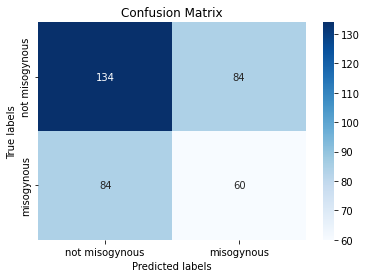

In [97]:
ax= plt.subplot()
sns.heatmap([[mean(tn_bma), mean(fp_bma)],[mean(fn_bma), mean(tp_bma)]], annot=True, fmt='g', cmap="Blues", ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not misogynous', 'misogynous']); ax.yaxis.set_ticklabels(['not misogynous', 'misogynous'])

In [98]:
measures = ["Prec pos","Prec neg","Rec pos","Rec neg","F1 pos","F1 neg", "ACC", "AUC"]

res_bma = {"measures": measures, 
       "SVM": [item for sublist in global_results['SVM'] for item in sublist] ,
       "KNN":  [item for sublist in global_results['KNN'] for item in sublist] ,
       "NB":  [item for sublist in global_results['NB'] for item in sublist] ,
       "DT":  [item for sublist in global_results['DT'] for item in sublist] ,
       "MLP":  [item for sublist in global_results['MLP'] for item in sublist] ,
       "BMA": bma_res
       }

In [99]:
risultati = pd.DataFrame(res_bma)
risultati

,measures,SVM,KNN,NB,DT,MLP,BMA
0,Prec pos,0.441862,0.459351,0.417178,0.451711,0.439741,0.417539
1,Prec neg,0.627799,0.638246,0.616915,0.629406,0.631603,0.614491
2,Rec pos,0.416552,0.432414,0.468966,0.387586,0.468276,0.417931
3,Rec neg,0.651598,0.663014,0.566210,0.688584,0.604110,0.614155
4,F1 pos,0.428830,0.445449,0.441558,0.417160,0.453313,0.417670
5,F1 neg,0.639475,0.650380,0.590476,0.657650,0.617370,0.614280
6,ACC,0.557967,0.571154,0.527473,0.568681,0.550000,0.535989
7,AUC,0.550058,0.532989,0.517084,0.514369,0.557808,0.536986


In [55]:
risultati.to_csv("../data/results2strategy/tags/masked_sintest/tags_res_bma_sintest.csv", sep="\t", index= False)

In [23]:
# Crate a csv file with averages model performances on test data

risultati.to_csv(project_paths.csv_uni_tags_syn_res, sep="\t", index= False)

In [109]:
project_paths.csv_uni_tags_syn_masked_res

'../data/results2strategy/tags/masked_sintest/tags_res_bma_sin_test2202.csv'

In [110]:
risultati.to_csv(project_paths.csv_uni_tags_syn_masked_res, sep="\t", index= False)

#### masked count

In [74]:
project_paths.csv_uni_tags_syn_masked_count_res

'../data/results2strategy/tags/masked_count_sintest/tags_res_bma_test2202.csv'

In [75]:
risultati.to_csv(project_paths.csv_uni_tags_syn_masked_count_res, sep="\t", index= False)

#### censored

In [100]:
project_paths.csv_uni_tags_syn_censored_res

'../data/results2strategy/tags/censored_sintest/tags_res_bma_sin_test2202.csv'

In [101]:
risultati.to_csv(project_paths.csv_uni_tags_syn_censored_res, sep="\t", index= False)

In [19]:
dataset = load_data.load_test_data_tag()
dataset

,file_name,misogynous,Straw,Pepperoni,Hallway,Potato,Pie,Tablet,Luggage,Bolt,...,Barricade,Ribbon,Magazine,Goose,Heart,Crowd,Fish,Sky,Shadow,Cloud
0,15236.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
1,15805.jpg,1,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
2,16254.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
3,16191.jpg,1,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
4,15952.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15591.jpg,1,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
996,15049.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
997,15363.jpg,1,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0
998,15199.jpg,0,0.0,0.0,0.0,0,0,0.0,0,0.0,...,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0


In [14]:
data = load_data.load_syn_data_tag()
data

,Unnamed: 0.1,0,misogynous,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1,Straw,Pepperoni,...,Barricade,Ribbon,Magazine,Goose,Heart,Crowd,Fish,Sky,Shadow,Cloud
0,0,belong_19,1,"['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
1,1,belong_21,1,"['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
2,2,belong_26,1,"['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
3,3,belong_30,1,"['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
4,4,belong_31,0,"['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.913384,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
360,366,whisker_6,0,"['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
361,367,whisker_7,0,"['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0
362,368,whisker_8,0,"['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0,0.0,0,...,0,0.0,0,0,0.0,0.0,0,0.0,0.000000,0.0


In [18]:
dataset = load_data.load_new_syn_data()
dataset

,Unnamed: 0,0,misogynous,1,tag list,text,cleaned,lemmas,Unnamed: 0.1.1.1
0,0,belong_19,1,"[{'class': 'Man', 'conf': 0.896746814250946, '...","['Letter', 'Face', 'Column', 'Food', 'Mouth', ...",WHERE WOMEN\nBELONG\nvanzameme.org,woman belong,"['woman', 'belong']",NaN
1,1,belong_21,1,"[{'class': 'Hair', 'conf': 0.9521085023880005,...","['Woman', 'Face', 'Shoulder', 'Mouth', 'Wall',...",SO YOU'RE TELLING ME WOMEN DON'T\nACTUALLY BEL...,you tell i woman actually belong kitchen weizwent,"['you', 'tell', 'i', 'woman', 'actually', 'bel...",NaN
2,2,belong_26,1,"[{'class': 'Man', 'conf': 0.876247763633728, '...","['Letter', 'Face', 'Lip', 'Mouth', 'Shoulder',...",WOMEN BELONG\nIN THE KITCHEN\nmakeameme.org,woman belong kitchen,"['woman', 'belong', 'kitchen']",NaN
3,3,belong_30,1,"[{'class': 'Shirt', 'conf': 0.8054261803627014...","['Writing', 'Boy', 'Design', 'Ear', 'Nose', 'S...",I like my coffee like I like my\nSoop women\ni...,i like my coffee like i like my soop woman kit...,"['i', 'like', 'my', 'coffee', 'like', 'i', 'li...",NaN
4,4,belong_31,0,"[{'class': 'Bottom', 'conf': 0.938902318477630...","['Ground', 'Stem', 'Stripe', 'Onion', 'Shadow'...",Not every place you fit in is where you\nbelong.,place you fit you belong,"['place', 'you', 'fit', 'you', 'belong']",NaN
...,...,...,...,...,...,...,...,...,...
359,365,whisker_5,0,"[{'class': 'Cat', 'conf': 0.9676588177680969, ...","['Cat', 'Nose', 'Fur', 'Stripe', 'Face', 'Eye'...",NICE TO SEE YOU. NICE TO SEE YOU.\nRD,nice you nice you rd,"['nice', 'you', 'nice', 'you', 'rd']",136.0
360,366,whisker_6,0,"[{'class': 'Cat', 'conf': 0.8915164470672607, ...","['Cat', 'Nose', 'Eye', 'Ear', 'Whisker', 'Head...",IS IT NORMAL FOR MY CAT\nTO HAVE LONG WHISKERS...,it normal my cat long whisker,"['it', 'normal', 'my', 'cat', 'long', 'whisker']",137.0
361,367,whisker_7,0,"[{'class': 'Ear', 'conf': 0.9311652779579163, ...","['Cat', 'Nose', 'Face', 'Wall', 'Hair', 'Eye',...",Why Are My Cats Whiskers So Long,my cat whisker long,"['my', 'cat', 'whisker', 'long']",138.0
362,368,whisker_8,0,"[{'class': 'Eye', 'conf': 0.9018651843070984, ...","['Bucket', 'Paw', 'Cat', 'Nose', 'Plant', 'Fur...",This humidity is killing my hair!,humidity kill my hair,"['humidity', 'kill', 'my', 'hair']",139.0


In [20]:
dataset = load_data.load_test_data()
dataset

,file_name,Text Transcription,misogynous
0,15236.jpg,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,0
1,15805.jpg,"SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?",1
2,16254.jpg,WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN,0
3,16191.jpg,Photographing something you want to show every...,1
4,15952.jpg,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,0
...,...,...,...
995,15591.jpg,IT'S NOT YOUR FAULT You didn't design the dres...,1
996,15049.jpg,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,0
997,15363.jpg,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...,1
998,15199.jpg,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...,0
